<a href="https://colab.research.google.com/github/ImanFakury/imanRepository/blob/master/CommunicationSystems/CHW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font face="Times New Roman" size=5>
<div dir=rtl align="center">
<font face="Times New Roman" size=5>
</font>
<br>
<img src="https://logoyar.com/content/wp-content/uploads/2021/04/sharif-university-logo.png" alt="University Logo" width="150" height="150">
<br>
<font face="Times New Roman" size=4 align=center>
Sharif University of Technology - Department of Electrical Engineering
</font>
<br>
<font color="#008080" size=6>
Communication Systems
</font>
<hr/>
<font color="#800080" size=5>
Assignment 2
<br>
</font>
<font size=5>
<br>
</font>
<font size=4>
Fall 2024
<br>
</font>

# Analog Modulation Techniques Implementation Using Python
## Iman Alizadeh Fakouri

# Import Libraries

In [476]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter, fftconvolve
from scipy.fftpack import fft, fftfreq, fftshift

# Question 1

### **Signal Analysis and Modulation-Demodulation (DSB-SC)**

This task is designed to help you understand signal processing concepts by creating, modulating, and recovering signals while exploring their behavior in both the time and frequency domains. Here's what you'll do:

---

#### **1. Create a Composite Signal**
Your first step is to generate a signal $ m_1(t) $, which combines three sinc functions. These functions are shifted in time and scaled to form a band-limited signal. Think of $ m_1(t) $ as a smooth waveform created by stacking and aligning these sinc shapes. The equation for $ m_1(t) $ is:  
$$
m_1(t) = 2 \cdot \text{sinc}\left(\frac{2t}{T_a}\right) + \text{sinc}\left(\frac{2t}{T_a} + 1\right) + \text{sinc}\left(\frac{2t}{T_a} - 1\right)
$$
Here, $ T_a = 0.01 $ determines the scaling of the sinc functions.

---

#### **2. Modulate the Signal Using DSB-SC**
Next, modulate $ m_1(t) $ using the Double Sideband Suppressed Carrier (DSB-SC) technique. This involves multiplying $ m_1(t) $ by a cosine wave with a carrier frequency $ f_c = 300 \, \text{Hz} $. The modulated signal $s_1(t) $ is given by:  
$$
s_1(t) = m_2(t) \cdot \cos(2 \pi f_c t)
$$
This process shifts the frequency content of $ m_1(t) $ to higher frequencies, a key step in communication systems.

---

#### **3. Create a Triangular Message Signal**
Now, generate a new signal $ m_2(t) $, which is non-band-limited and consists of two triangular shapes. Imagine a slope that starts from -0.01, rises to 0, and then falls back to 0.01. Outside this small interval, the signal is zero. The mathematical definition of $ m_2(t) $ is:  
$$
m_2(t) = \begin{cases}
t + 0.01 & \text{for } -0.01 \leq t < 0 \\
0.01 - t & \text{for } 0 \leq t < 0.01 \\
0 & \text{otherwise}
\end{cases}
$$

---

#### **4. Recover the Signal (Coherent Demodulation)**
To retrieve $ m_2(t) $, perform coherent demodulation. This involves:  
- Multiplying the modulated signal $ s_2(t) $ by the same cosine wave used during modulation.  
- Filtering the result using a lowpass FIR filter to remove high-frequency components.  

The FIR lowpass filter is designed with a bandwidth of 150 Hz and an order of 40. After filtering, you should recover $ m_1(t) $.

---

#### **5. Analyze and Visualize**
Finally, analyze the results with the following steps:  
(a) Plot $ m_1(t) $, $ s_1(t) $, $ m_2(t) $ , $ s_2(t)$, and the demodulated signal in the time domain to observe their behavior.  
(b) Plot the frequency spectra of these signals to examine their frequency content.  
(c) Discuss your observations. Does the recovered signal match the original? Is there any distortion or loss of information during demodulation?


# M1(t)

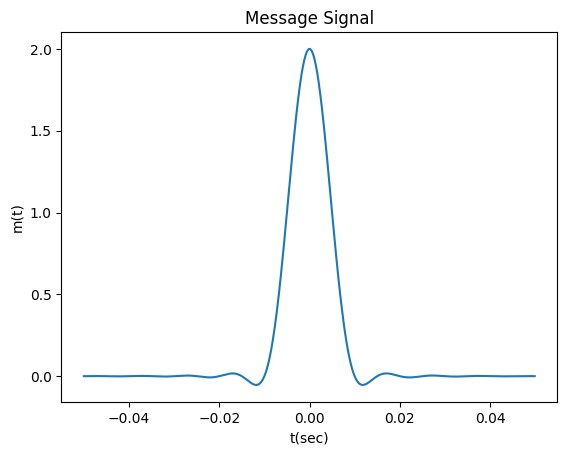

In [477]:
# Part 1 :
Ta = 0.01
fc = 300
Fs = 10000
T = 1 / Fs
t = np.arange(-0.05,0.05, T)

# Create m1(t)
m1 = (2 * np.sinc(2 * t / Ta) +   np.sinc(2 * t / Ta + 1) +  np.sinc(2 * t / Ta - 1))

# Plot m1(t)
plt.plot(t, m1)
plt.title("Message Signal")
plt.xlabel("t(sec)")
plt.ylabel("m(t)")
plt.show()


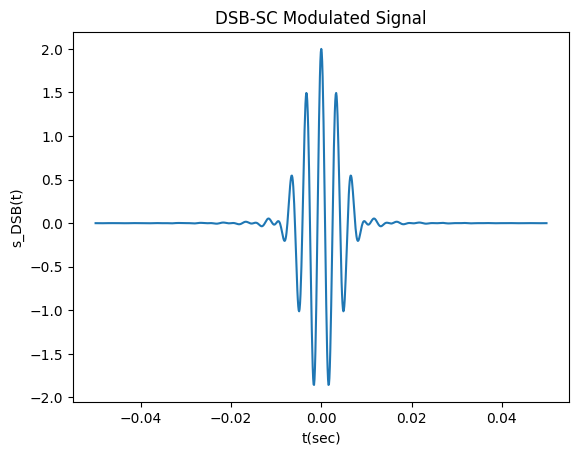

In [478]:
# Part 2 :
# DSB Modulation of Signal
fc=300
s1 = m1 * np.cos(2*np.pi*fc*t)

# Plot s1(t)
plt.plot(t, s1)
plt.title("DSB-SC Modulated Signal")
plt.xlabel("t(sec)")
plt.ylabel("s_DSB(t)")
plt.show()

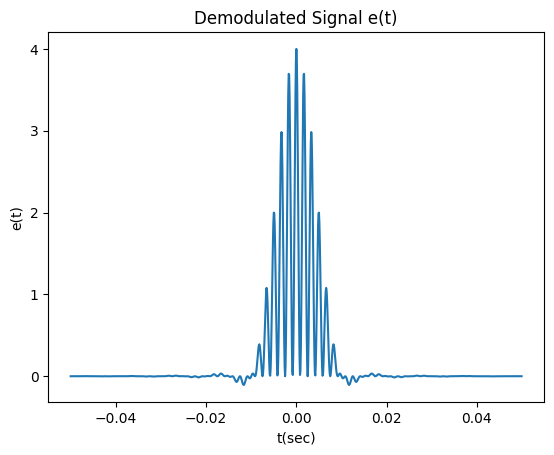

In [479]:
# Part 4 :
# Demodulation of Signal
fc=300
m1_demodulated = s1 * 2*np.cos(2*np.pi*fc*t)

# Plot e1(t)
plt.plot(t, m1_demodulated)
plt.title("Demodulated Signal e(t)")
plt.xlabel("t(sec)")
plt.ylabel("e(t)")
plt.show()

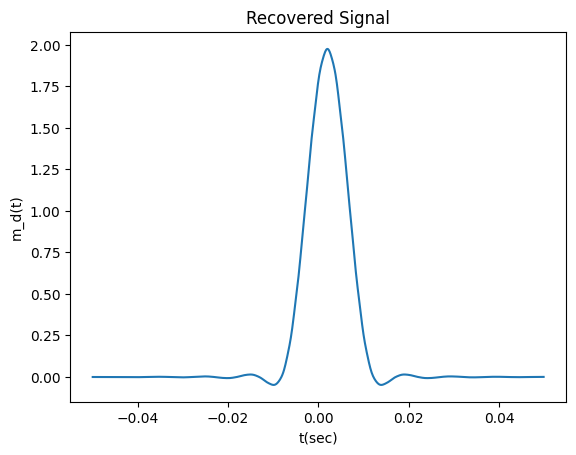

In [480]:
# Part 4:
# FIR Lowpass filter design
lpf_order = 40
cutoff = 150 / (Fs / 2)  # Normalized cutoff frequency (0 to 1 range)
lpf = firwin(lpf_order + 1, cutoff)
m1_recovered = lfilter(lpf, 1.0, m1_demodulated)


# Plot recovered signal
plt.plot(t, m1_recovered)
plt.title("Recovered Signal")
plt.xlabel("t(sec)")
plt.ylabel("m_d(t)")
plt.show()

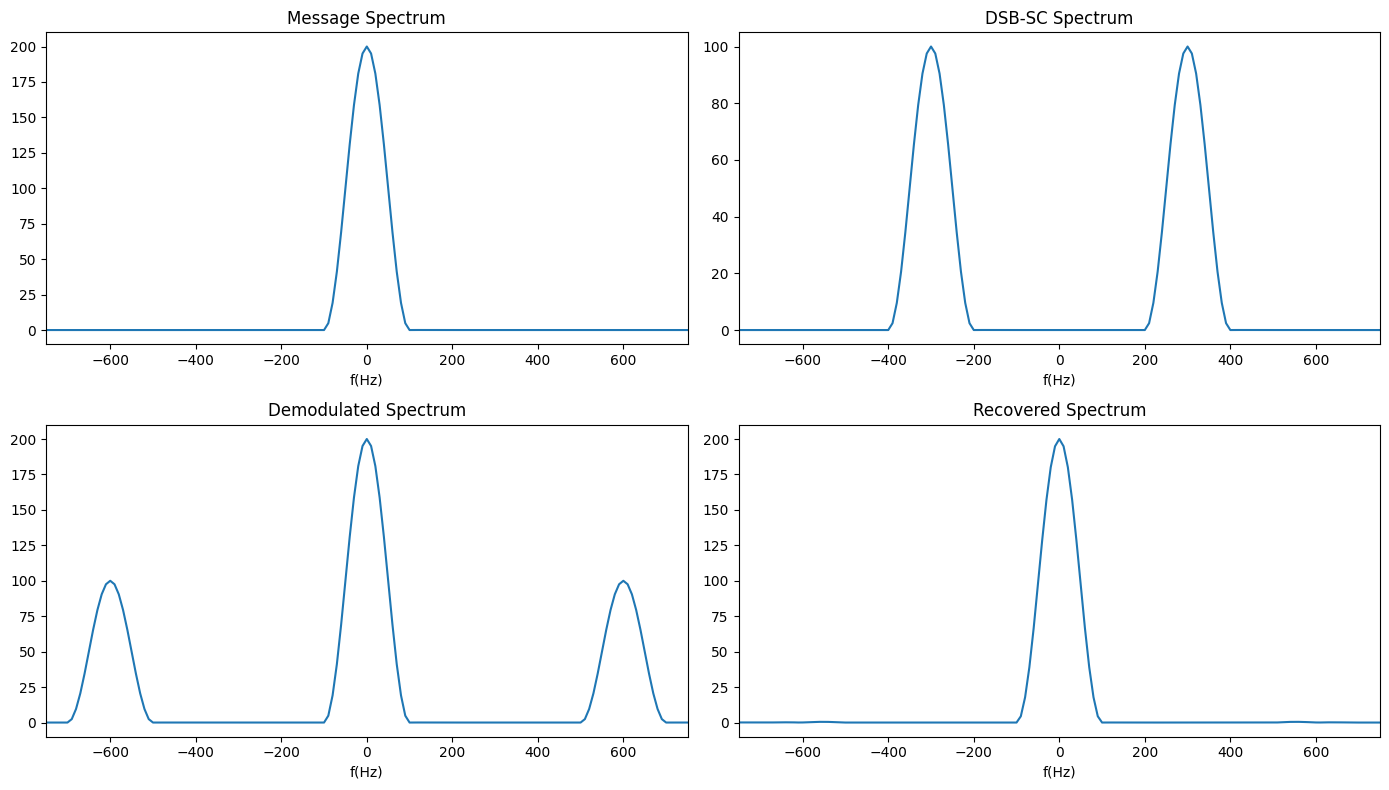

In [481]:
# Part 5
# Frequency domain analysis
def plot_spectrum(signal, Fs, title,ax):
    f = fftfreq(len(signal), 1 / Fs)
    f = fftshift(f)
    spectrum = np.abs(fft(signal))
    spectrum = fftshift(spectrum)
    ax.plot(f, spectrum)
    ax.set_title(title)
    ax.set_xlabel("f(Hz)")
    ax.set_xlim([-750, 750])

# Plot frequency spectra
fig,axes=plt.subplots(2,2,figsize=(14,8))
plot_spectrum(m1, Fs, "Message Spectrum",ax=axes[0,0])
plot_spectrum(s1, Fs, "DSB-SC Spectrum",ax=axes[0,1])
plot_spectrum(m1_demodulated, Fs, "Demodulated Spectrum",ax=axes[1,0])
plot_spectrum(m1_recovered, Fs, "Recovered Spectrum",ax=axes[1,1])
plt.tight_layout()
plt.show()

# M2(t) :

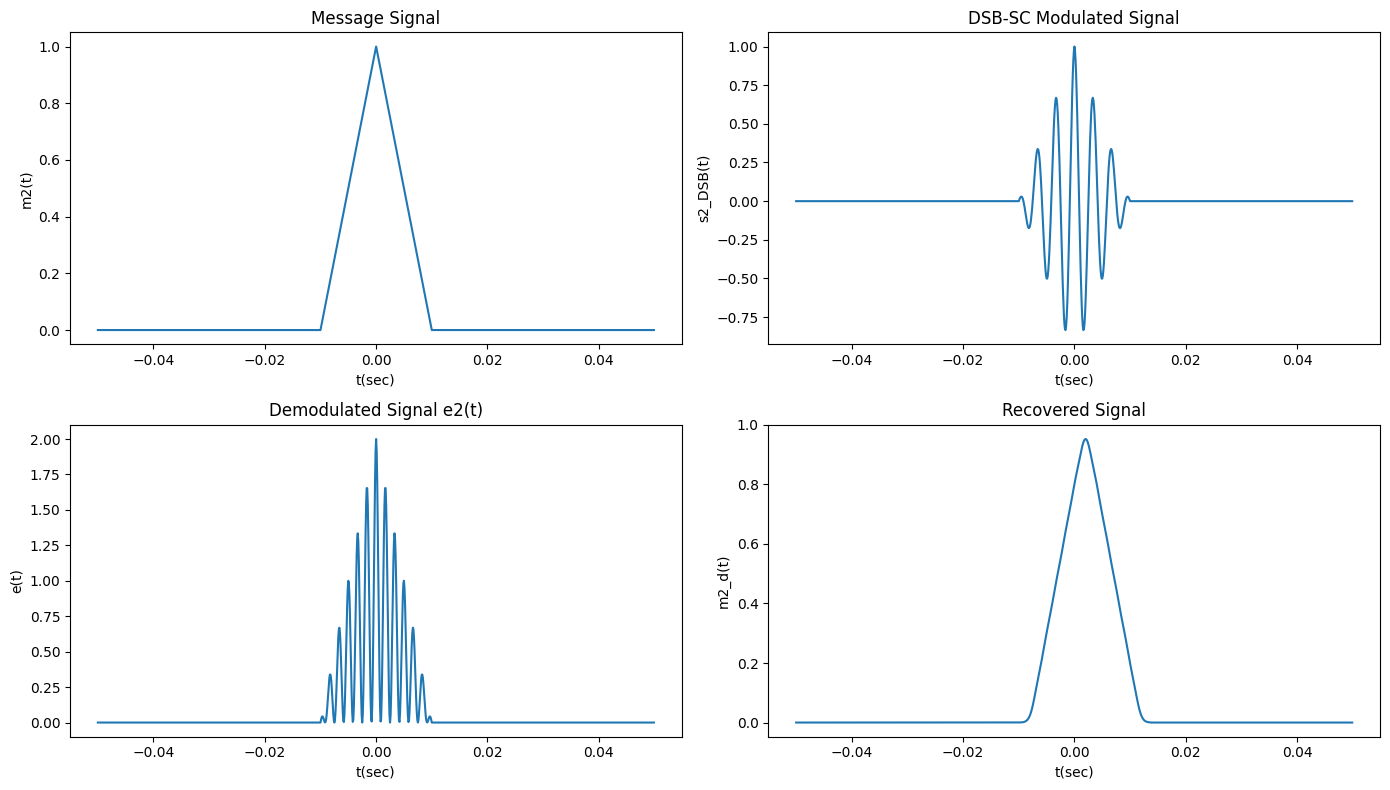

In [482]:
def triangular_wave(t):
    if -0.01 <= t < 0:
        return 100*t + 1
    elif 0 <= t < 0.01:
        return 1-100*t
    else:
        return 0

Ta = 0.01
fc = 300
Fs = 10000
T = 1 / Fs
t = np.arange(-0.05,0.05, T)
# Create m2(t)
m2 = [triangular_wave(x) for x in t]
# DSB Modulation of Signal
fc=300
s2 = m2 * np.cos(2*np.pi*fc*t)
# Demodulation of Signal
fc=300
m2_demodulated = s2 * 2*np.cos(2*np.pi*fc*t)
# FIR Lowpass filter design
lpf_order = 40
cutoff = 150 / (Fs / 2)  # Normalized cutoff frequency (0 to 1 range)
lpf = firwin(lpf_order + 1, cutoff)
m2_recovered = lfilter(lpf, 1.0, m2_demodulated)



fig,axes=plt.subplots(2,2,figsize=(14,8))
# Plot m2(t)
axes[0,0].plot(t, m2)
axes[0,0].set_title("Message Signal")
axes[0,0].set_xlabel("t(sec)")
axes[0,0].set_ylabel("m2(t)")

# Plot s2(t)
axes[0,1].plot(t, s2)
axes[0,1].set_title("DSB-SC Modulated Signal")
axes[0,1].set_xlabel("t(sec)")
axes[0,1].set_ylabel("s2_DSB(t)")


# Plot e2(t)
axes[1,0].plot(t, m2_demodulated)
axes[1,0].set_title("Demodulated Signal e2(t)")
axes[1,0].set_xlabel("t(sec)")
axes[1,0].set_ylabel("e(t)")


# Plot recovered signal
axes[1,1].plot(t, m2_recovered)
axes[1,1].set_title("Recovered Signal")
axes[1,1].set_xlabel("t(sec)")
axes[1,1].set_ylabel("m2_d(t)")

plt.tight_layout()
plt.show()

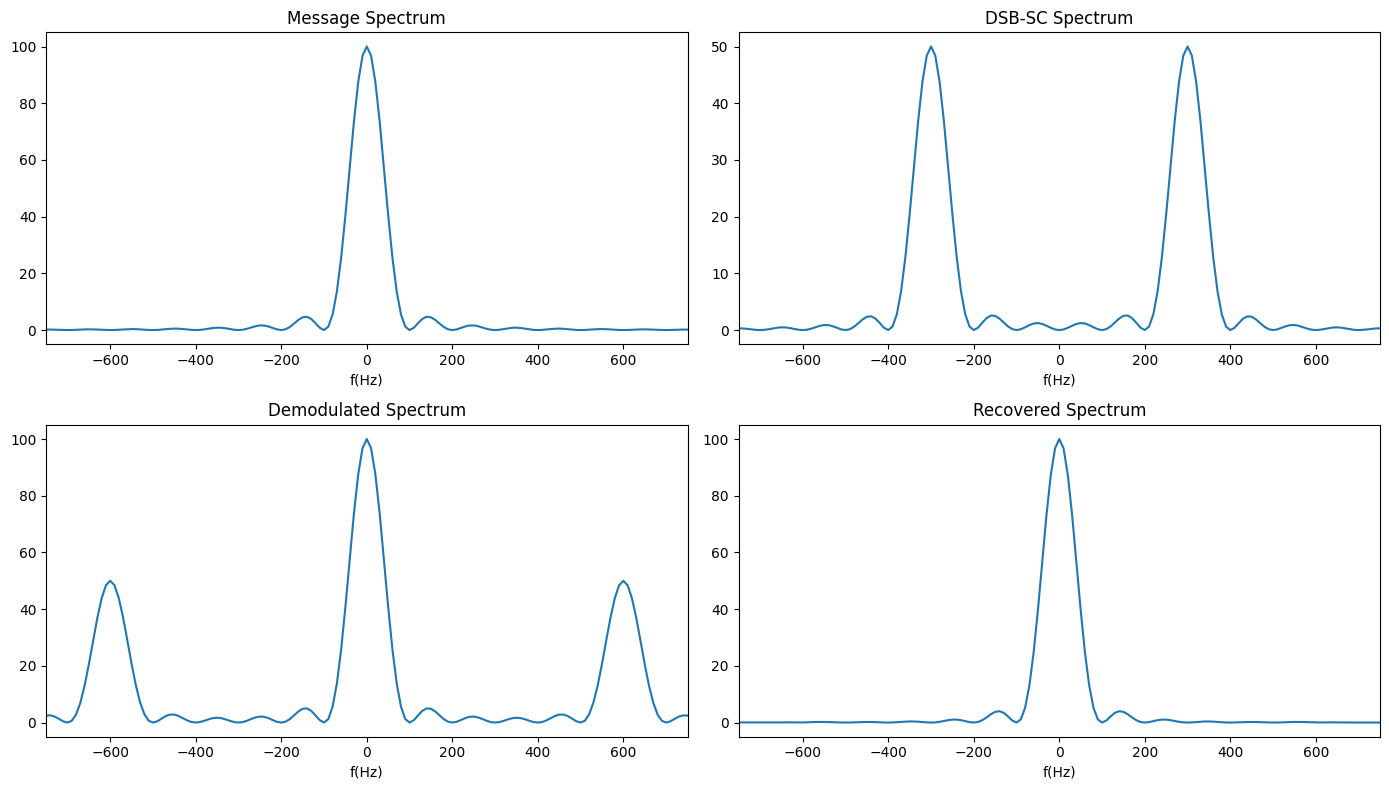

In [483]:
# Frequency domain analysis
def plot_spectrum(signal, Fs, title,ax):
    f = fftfreq(len(signal), 1 / Fs)
    f = fftshift(f)
    spectrum = np.abs(fft(signal))
    spectrum = fftshift(spectrum)
    ax.plot(f, spectrum)
    ax.set_title(title)
    ax.set_xlabel("f(Hz)")
    ax.set_xlim([-750, 750])


# Plot frequency spectra
fig,axes=plt.subplots(2,2,figsize=(14,8))
plot_spectrum(m2, Fs, "Message Spectrum",ax=axes[0,0])
plot_spectrum(s2, Fs, "DSB-SC Spectrum",ax=axes[0,1])
plot_spectrum(m2_demodulated, Fs, "Demodulated Spectrum",ax=axes[1,0])
plot_spectrum(m2_recovered, Fs, "Recovered Spectrum",ax=axes[1,1])
plt.tight_layout()
plt.show()

# Question 2

### **Amplitude Modulation and Signal Recovery (AM)**

This exercise is crafted to deepen your understanding of signal processing by guiding you through the creation, modulation, and recovery of signals. By analyzing their behaviors in both time and frequency domains, you'll gain insights into the underlying principles of amplitude modulation (AM) and its real-world implications. Here’s a breakdown of the process:

---

#### **1. Generating the Message Signal**
We begin by constructing the message signal, $ m(t) $, which contains the information to be transmitted. Two types of signals are used:

- **Composite Band-limited Signal ($ m_1(t) $)**: A sum of three shifted sinc functions forms $ m_1(t) $, representing a smooth band-limited waveform. Its mathematical expression is:  
  $$
  m_1(t) = 2 \cdot \text{sinc}\left(\frac{2t}{T_a}\right) + \text{sinc}\left(\frac{2t}{T_a} + 1\right) + \text{sinc}\left(\frac{2t}{T_a} - 1\right),
  $$  
  where $ T_a = 0.01 $.

- **Triangular Signal ($ m_2(t) $)**: This signal represents a triangular waveform rising and falling symmetrically between $ -0.01 $ and $ 0.01 $ seconds, defined as:  
  $$
  m_2(t) =
  \begin{cases}
  \dfrac{t}{0.01} & \text{for } -0.01 \leq t < 0.01, \\
  0 & \text{otherwise}.
  \end{cases}
  $$

---

#### **2. Modulation: Amplitude Modulation (AM)**
The message signal is modulated using a carrier wave at $ f_c = 300 $ Hz. This involves scaling and shifting the signal's frequency content, creating the AM-modulated signal:  
$$
s_{\text{AM}}(t) = (1 + \mu \cdot m(t)) \cdot \cos(2 \pi f_c t),
$$  
where $ \mu $ (modulation index) is set to 0.5 to ensure a balance between carrier and message amplitudes.

The result is an amplitude-modulated waveform that effectively encodes $ m(t) $ within the carrier frequency's envelope.

---

#### **3. Demodulation: Recovering the Message Signal**
To extract the original message signal, a two-step process is applied:

- **Rectification**: The negative parts of the AM signal are removed, creating a rectified waveform.
- **Lowpass Filtering**: A Butterworth filter with a cutoff frequency of 150 Hz is used to smooth the rectified signal and remove high-frequency components.

These steps recover the envelope of the AM signal, approximating the original $ m(t) $.

---

#### **4. Frequency and Time Domain Analysis**
The signals are analyzed in both domains to gain insights into their behavior:

- **Time Domain**: Plot $ m(t) $, $ s_{\text{AM}}(t) $, the rectified signal, and the recovered signal. Observe how the signals evolve at each step.
- **Frequency Domain**: Use Fourier transforms to analyze the frequency content. Key observations include:
  - Peaks at the carrier frequency ($ f_c $) in the AM signal's spectrum.
  - The limited bandwidth of the message signal.
  - Distortions, if any, in the recovered signal spectrum.

---

#### **5. Analyze and Visualize**
Finally, analyze the results with the following steps:  
(a) Plot $ m(t) $, $ s_{\text{AM}}(t) $, the rectified signal, and the recovered signal in the time domain to observe their behavior.  
(b) Plot the frequency spectra of these signals to examine their frequency content.  
(c) Discuss your observations. Does the recovered signal match the original? Is there any distortion or loss of information during demodulation? How do the rectification and filtering processes affect the signal's accuracy?

# M1(t) :

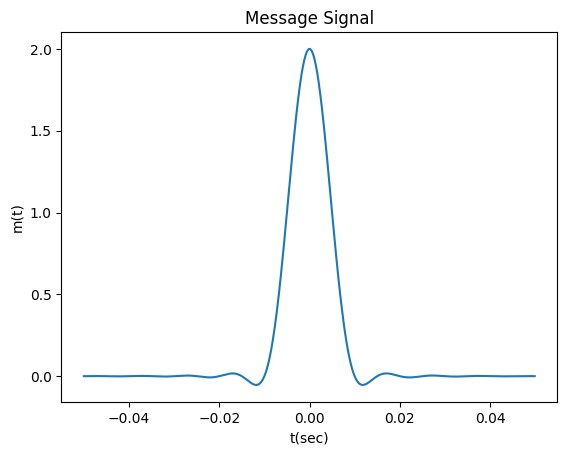

In [484]:
# Part 1 :
Ta = 0.01
fc = 300
Fs = 10000
T = 1 / Fs
t = np.arange(-0.05,0.05, T)

# Create m1(t)
m1 = (2 * np.sinc(2 * t / Ta) +   np.sinc(2 * t / Ta + 1) +  np.sinc(2 * t / Ta - 1))

# Plot m1(t)
plt.plot(t, m1)
plt.title("Message Signal")
plt.xlabel("t(sec)")
plt.ylabel("m(t)")
plt.show()


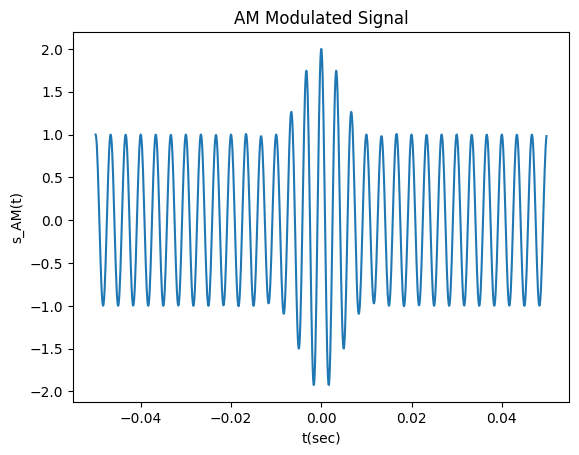

In [485]:
# Part 2
# AM Modulation
u=0.5
s1=(1+u*m1)*np.cos(2*np.pi*fc*t)
# Plot s1(t)
plt.plot(t, s1)
plt.title("AM Modulated Signal")
plt.xlabel("t(sec)")
plt.ylabel("s_AM(t)")
plt.show()

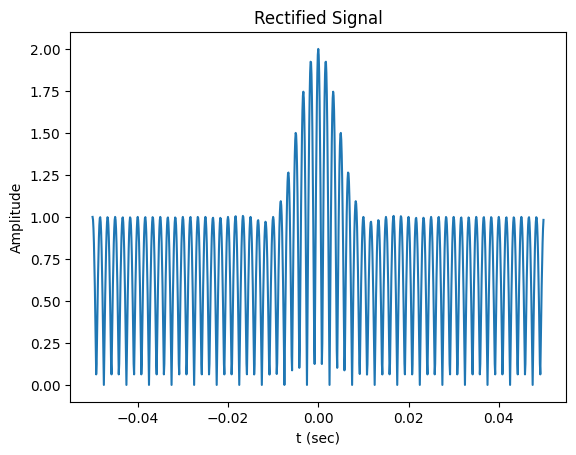

In [486]:
m1_rectified = np.abs(s1)
# Plot rectified  signal
plt.plot(t, m1_rectified)
plt.title('Rectified Signal')
plt.xlabel("t (sec)")
plt.ylabel("Amplitude")
plt.show()

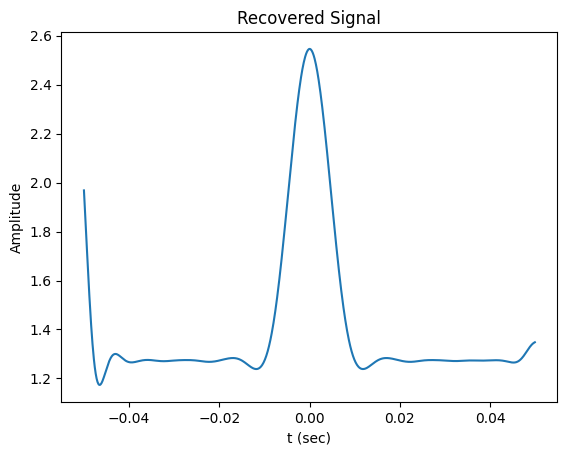

In [487]:
from scipy.signal import butter, filtfilt
#Lowpass Filtering
cutoff = 150
order = 4
b, a = butter(order, cutoff / (Fs / 2), btype='low')
m1_recovered = 2*filtfilt(b, a, m1_rectified)
# Plot recovered  signal
plt.plot(t, m1_recovered)
plt.title('Recovered Signal')
plt.xlabel("t (sec)")
plt.ylabel("Amplitude")
plt.show()

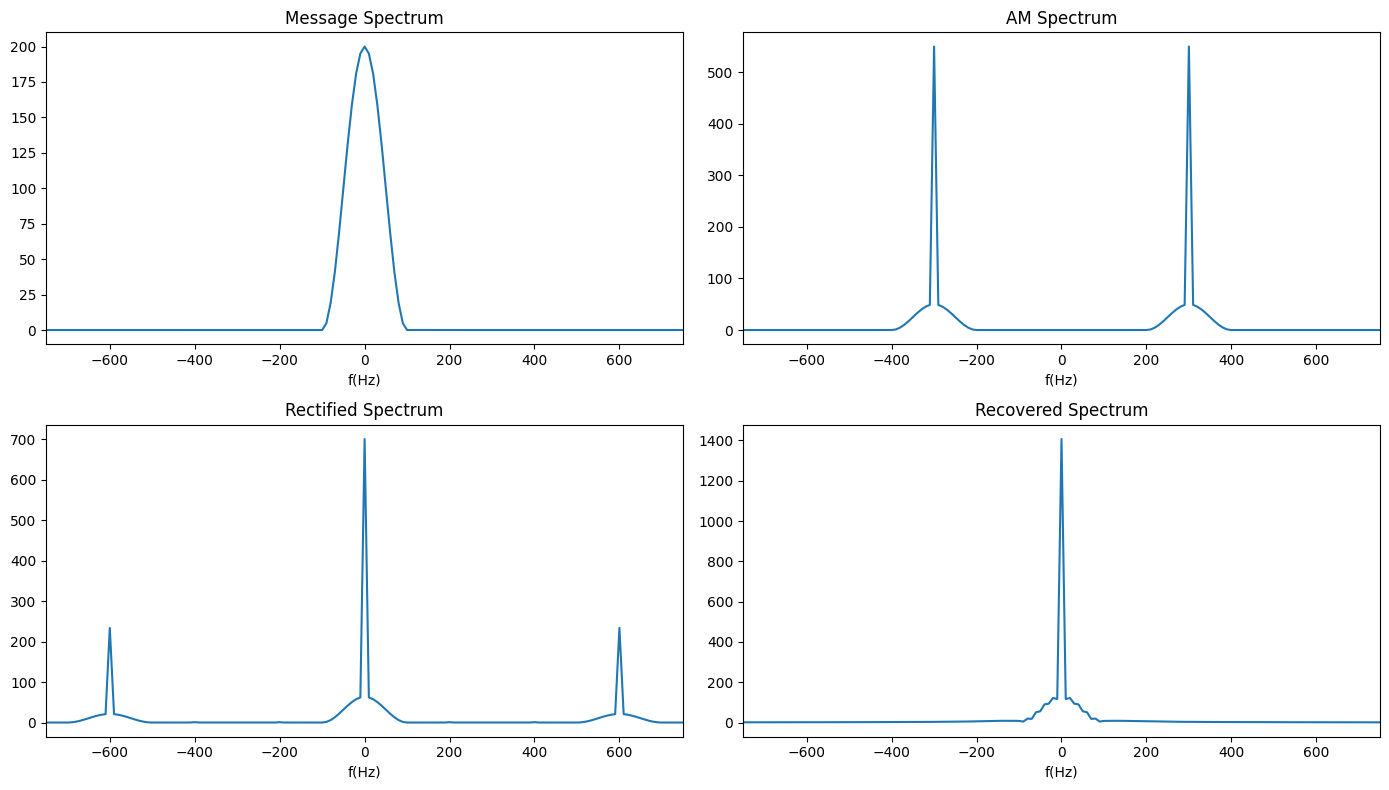

In [488]:
# Frequency domain analysis
def plot_spectrum(signal, Fs, title,ax):
    f = fftfreq(len(signal), 1 / Fs)
    f = fftshift(f)
    spectrum = np.abs(fft(signal))
    spectrum = fftshift(spectrum)
    ax.plot(f, spectrum)
    ax.set_title(title)
    ax.set_xlabel("f(Hz)")
    ax.set_xlim([-750, 750])

# Plot frequency spectra
fig,axes=plt.subplots(2,2,figsize=(14,8))
plot_spectrum(m1, Fs, "Message Spectrum",ax=axes[0,0])
plot_spectrum(s1, Fs, "AM Spectrum",ax=axes[0,1])
plot_spectrum(m1_rectified, Fs, "Rectified Spectrum",ax=axes[1,0])
plot_spectrum(m1_recovered, Fs, "Recovered Spectrum",ax=axes[1,1])
plt.tight_layout()
plt.show()

# M2(t) :

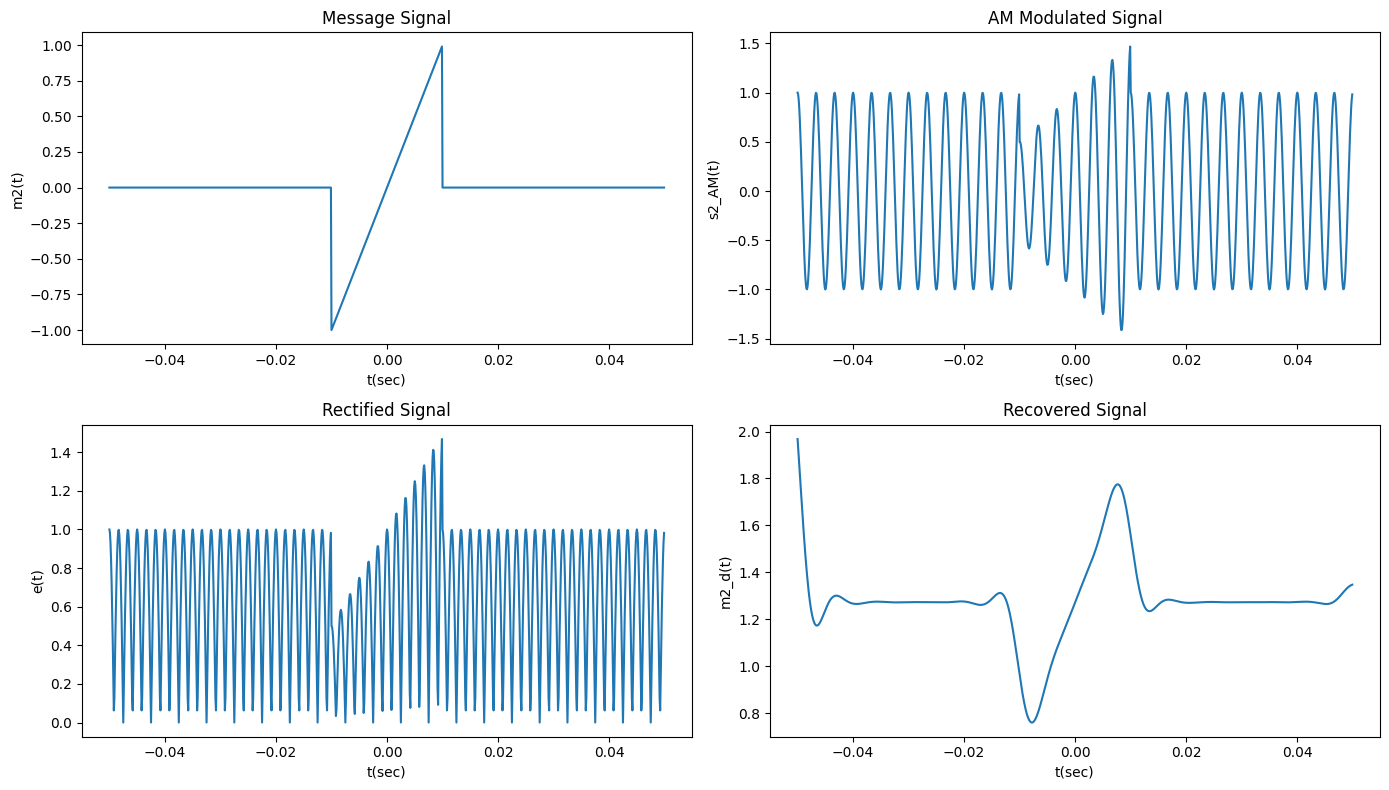

In [489]:
def triangular_wave(t):
    if -0.01 <= t < 0.01:
        return 100*t
    else:
        return 0

Ta = 0.01
fc = 300
Fs = 10000
T = 1 / Fs
t = np.arange(-0.05,0.05, T)
# Create m2(t)
m2 = np.array([triangular_wave(x) for x in t])
# AM Modulation of Signal
u=0.5
s2=(1+u*m2)*np.cos(2*np.pi*fc*t)
# Rectified of Signal
m2_rectified = np.abs(s2)
#Lowpass Filtering
cutoff = 150
order = 4
b, a = butter(order, cutoff / (Fs / 2), btype='low')
m2_recovered = 2*filtfilt(b, a, m2_rectified)



fig,axes=plt.subplots(2,2,figsize=(14,8))
# Plot m2(t)
axes[0,0].plot(t, m2)
axes[0,0].set_title("Message Signal")
axes[0,0].set_xlabel("t(sec)")
axes[0,0].set_ylabel("m2(t)")

# Plot s2(t)
axes[0,1].plot(t, s2)
axes[0,1].set_title("AM Modulated Signal")
axes[0,1].set_xlabel("t(sec)")
axes[0,1].set_ylabel("s2_AM(t)")


# Plot rectified signal
axes[1,0].plot(t, m2_rectified)
axes[1,0].set_title("Rectified Signal")
axes[1,0].set_xlabel("t(sec)")
axes[1,0].set_ylabel("e(t)")


# Plot recovered signal
axes[1,1].plot(t, m2_recovered)
axes[1,1].set_title("Recovered Signal")
axes[1,1].set_xlabel("t(sec)")
axes[1,1].set_ylabel("m2_d(t)")

plt.tight_layout()
plt.show()

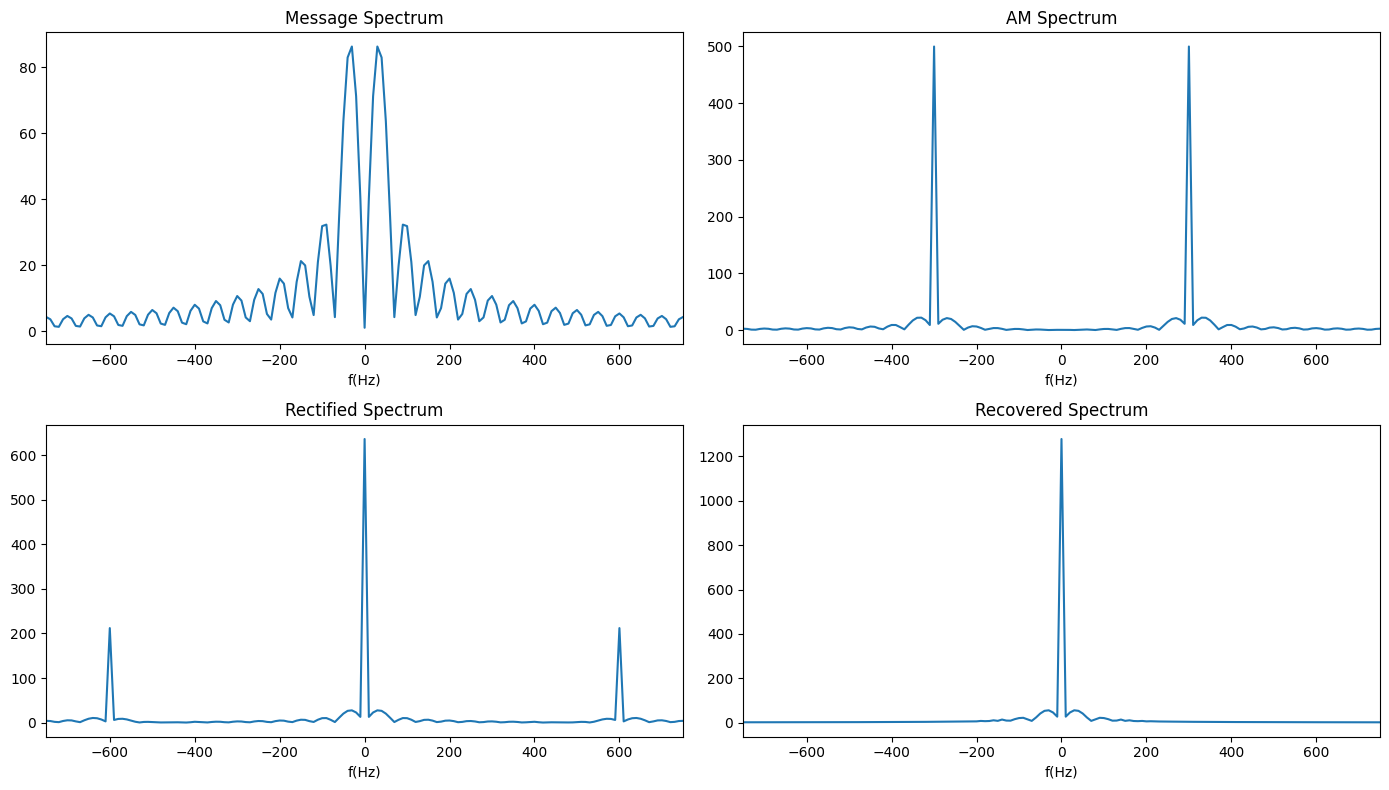

In [490]:
# Frequency domain analysis
def plot_spectrum(signal, Fs, title,ax):
    f = fftfreq(len(signal), 1 / Fs)
    f = fftshift(f)
    spectrum = np.abs(fft(signal))
    spectrum = fftshift(spectrum)
    ax.plot(f, spectrum)
    ax.set_title(title)
    ax.set_xlabel("f(Hz)")
    ax.set_xlim([-750, 750])

# Plot frequency spectra
fig,axes=plt.subplots(2,2,figsize=(14,8))
plot_spectrum(m2, Fs, "Message Spectrum",ax=axes[0,0])
plot_spectrum(s2, Fs, "AM Spectrum",ax=axes[0,1])
plot_spectrum(m2_rectified, Fs, "Rectified Spectrum",ax=axes[1,0])
plot_spectrum(m2_recovered, Fs, "Recovered Spectrum",ax=axes[1,1])
plt.tight_layout()
plt.show()

# Question 3

### **Single Sideband Suppressed Carrier (SSB-SC) Modulation and Recovery**

This exercise takes you through the creation, modulation, and recovery of Single Sideband Suppressed Carrier (SSB-SC) signals. By exploring the behavior of signals in the time and frequency domains, you'll deepen your understanding of advanced signal processing concepts and the efficient use of bandwidth in communication systems. Here's a step-by-step explanation of the process:

---

#### **1. Generating the Message Signal**
We start by generating a triangular message signal $ m(t) $, representing the information to be transmitted. It rises linearly from -0.01 to 0.01 seconds, forming a symmetric waveform. The mathematical expression is:

$$
m_1(t) = 2 \cdot \text{sinc}\left(\frac{2t}{T_a}\right) + \text{sinc}\left(\frac{2t}{T_a} + 1\right) + \text{sinc}\left(\frac{2t}{T_a} - 1\right)
$$

$$
m_2(t) =
\begin{cases}
\frac{t}{0.01} & \text{for } -0.01 \leq t < 0.01, \\
0 & \text{otherwise}.
\end{cases}
$$

Here, $ T_a = 0.01 $ determines the scaling of the sinc functions.

---

#### **2. Modulation: Double Sideband Suppressed Carrier (DSB-SC)**
The triangular signal $ m(t) $ is modulated with a carrier wave of frequency $ f_c = 300 \, \text{Hz} $, resulting in a DSB-SC signal:
$$
s_{\text{DSB}}(t) = m(t) \cdot \cos(2 \pi f_c t).
$$
This step shifts the spectrum of $ m(t) $ to center around $ \pm f_c $, producing both upper and lower sidebands.

---

#### **3. Filtering for SSB-SC (Upper Sideband)**
To create the SSB-SC signal, the spectrum is filtered to isolate the upper sideband. A band-stop filter removes the lower sideband:
$$
S_{\text{SSB}}(f) = S_{\text{DSB}}(f) \cdot \text{SSB\_filter}(f),
$$
where $\text{SSB\_filter}(f)$ removes the lower sideband, leaving only the upper sideband. The result is transformed back to the time domain using an inverse Fourier transform:
$$
s_{\text{SSB}}(t) = \mathcal{F}^{-1}\{S_{\text{SSB}}(f)\}.
$$

---

#### **4. Demodulation and Signal Recovery**
The SSB-SC signal is demodulated by multiplying it with the carrier and lowpass filtering:
$$
e(t) = s_{\text{SSB}}(t) \cdot 2 \cos(2 \pi f_c t),
$$
followed by a Butterworth lowpass filter with a cutoff frequency of $ 300 \, \text{Hz} $ to extract the message signal:
$$
m_d(t) = \text{LPF}(e(t)).
$$

---

#### **5. Analyze and Visualize**
Finally, analyze the results with the following steps:  
(a) Plot $ m(t) $, $ s_{\text{SSB}}(t) $, $ e(t) $, and $ m_d(t) $ in the time domain to observe their behavior.  
(b) Plot the frequency spectra of these signals to examine their frequency content.  
(c) Discuss your observations. How well is the signal recovered? Is there any loss of information due to filtering? What is the impact of isolating the upper or lower sideband on the signal's integrity?

---

#### **Bonus: Lower Sideband (LSB) Modulation and Recovery**
For completeness, the lower sideband (LSB) is also generated and recovered. The LSB filtering process involves removing the upper sideband instead:
$$
\text{LSB\_filter}(f) = 1 - \text{SSB\_filter}(f).
$$
The lower sideband spectrum is isolated:
$$
S_{\text{LSB}}(f) = S_{\text{DSB}}(f) \cdot \text{LSB\_filter}(f),
$$
and transformed back to the time domain:
$$
s_{\text{LSB}}(t) = \mathcal{F}^{-1}\{S_{\text{LSB}}(f)\}.
$$
Demodulation and recovery steps are the same as for the upper sideband, using:
$$
e_{\text{LSB}}(t) = s_{\text{LSB}}(t) \cdot 2 \cos(2 \pi f_c t),
$$
and a lowpass filter to extract:
$$
m_{d,\text{LSB}}(t).
$$

# M1(t) :

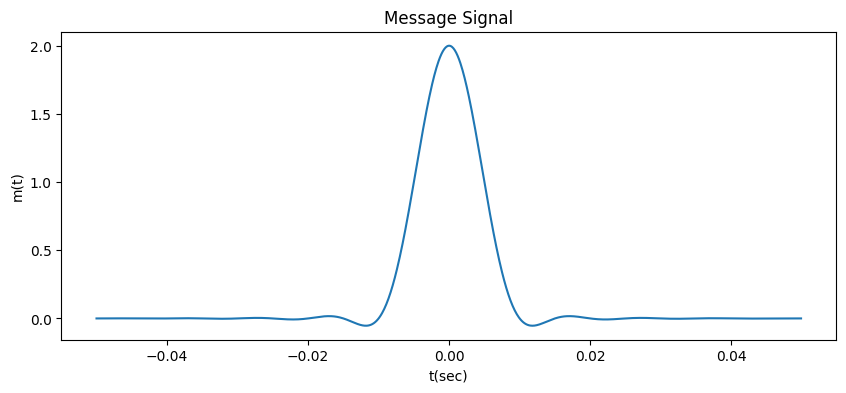

In [491]:
# Part 1 :
Ta = 0.01
fc = 300
Fs = 10000
T = 1 / Fs
t = np.arange(-0.05,0.05, T)

# Create m1(t)
m1 = (2 * np.sinc(2 * t / Ta) +   np.sinc(2 * t / Ta + 1) +  np.sinc(2 * t / Ta - 1))

# Plot m1(t)
plt.figure(figsize=(10,4))
plt.plot(t, m1)
plt.title("Message Signal")
plt.xlabel("t(sec)")
plt.ylabel("m(t)")
plt.show()


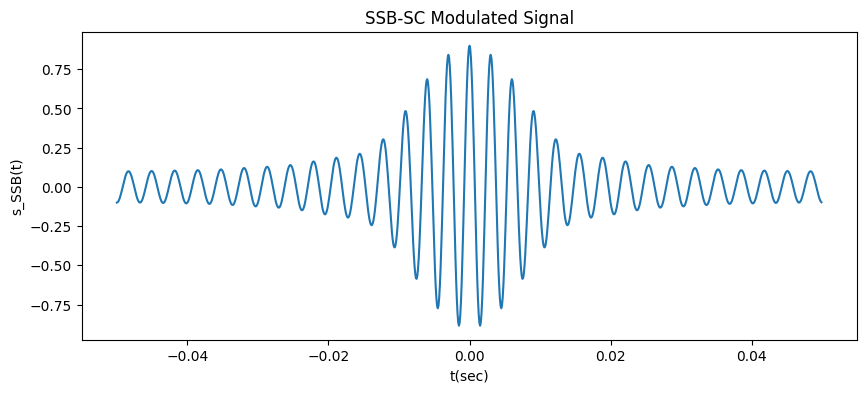

In [492]:
from scipy.fft import fft, ifft, fftshift
# DSB Modulation
sDSB = m1 * np.cos(2 * np.pi * fc * t)

# Band-stop filter design
S_DSB = fft(sDSB)
f = np.fft.fftfreq(len(t), T)
def bandstop_filter(f, lower_fc, upper_fc):
    filter_response = np.ones_like(f)
    filter_response[(f >= -upper_fc) & (f <= -lower_fc)] = 0
    filter_response[(f >= lower_fc) & (f <= upper_fc)] = 0
    return filter_response
lower_fc = 0
upper_fc = fc
SSB_filter = bandstop_filter(f, lower_fc, upper_fc)
S_SSB = S_DSB * SSB_filter
s1 = np.real(ifft(S_SSB))


# Plot s1(t)
plt.figure(figsize=(10,4))
plt.plot(t, s1)
plt.title("SSB-SC Modulated Signal")
plt.xlabel("t(sec)")
plt.ylabel("s_SSB(t)")
plt.show()


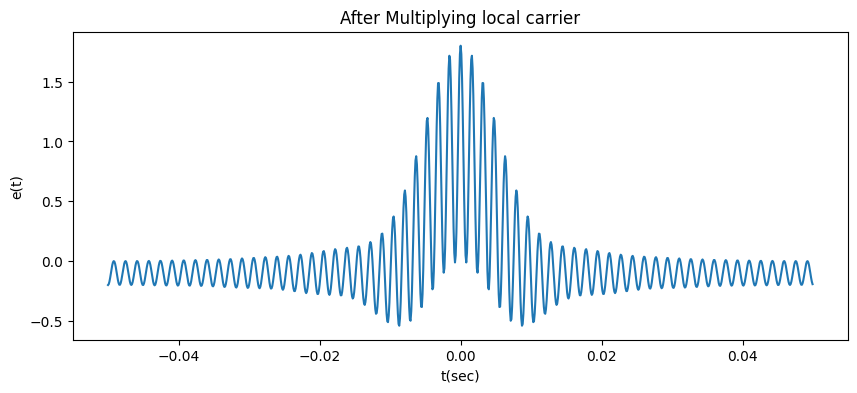

In [493]:
e1=s1*2*np.cos(2 * np.pi * fc * t)
# Plot e1(t)
plt.figure(figsize=(10,4))
plt.plot(t, e1)
plt.title("After Multiplying local carrier")
plt.xlabel("t(sec)")
plt.ylabel("e(t)")
plt.show()

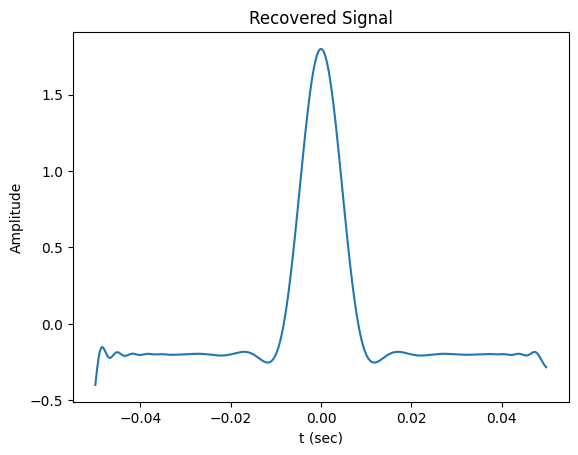

In [494]:
#Lowpass Filtering
cutoff = 300
order = 12
b, a = butter(order, cutoff / (Fs / 2), btype='low')
m1_recovered = 2*filtfilt(b, a, e1)
# Plot recovered  signal
plt.plot(t, m1_recovered)
plt.title('Recovered Signal')
plt.xlabel("t (sec)")
plt.ylabel("Amplitude")
plt.show()

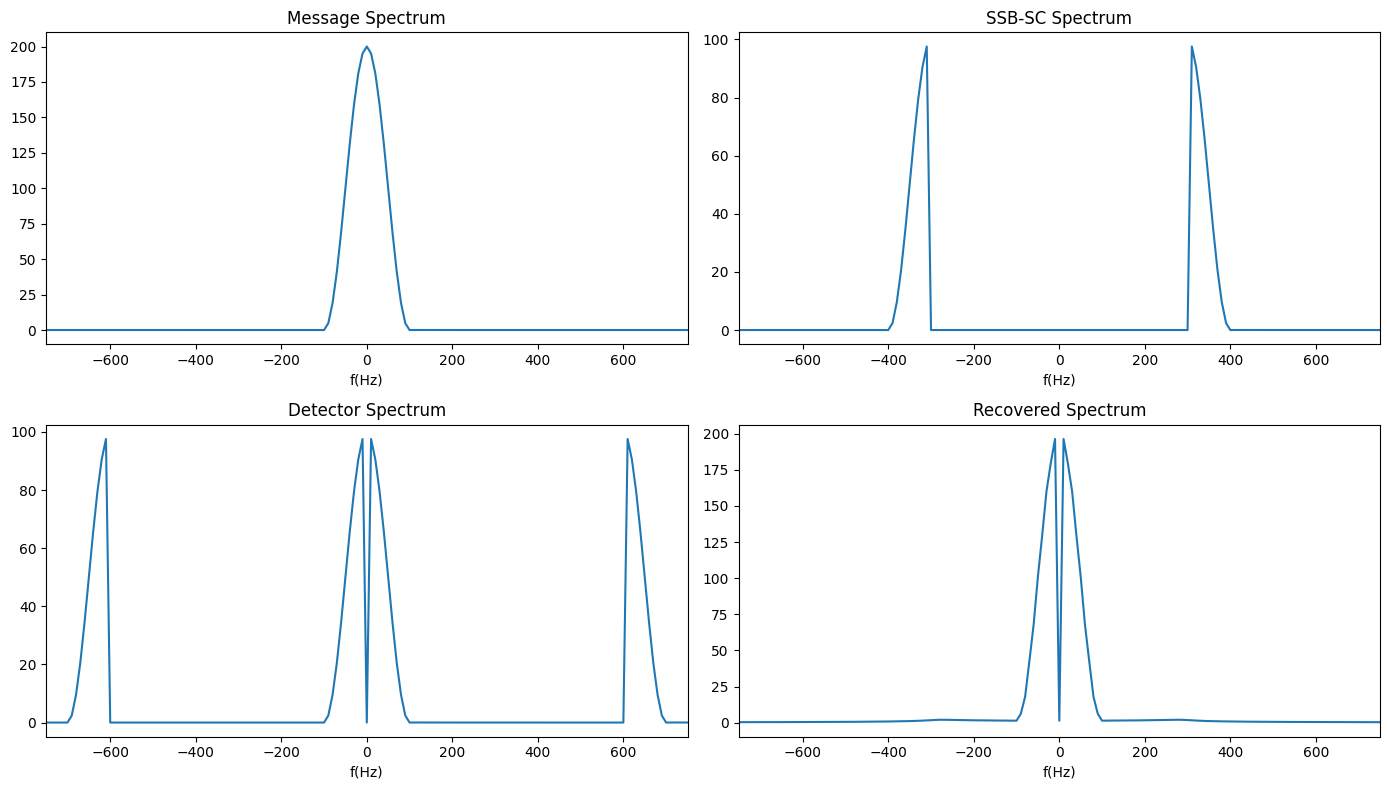

In [495]:
# Frequency domain analysis
def plot_spectrum(signal, Fs, title,ax):
    f = fftfreq(len(signal), 1 / Fs)
    f = fftshift(f)
    spectrum = np.abs(fft(signal))
    spectrum = fftshift(spectrum)
    ax.plot(f, spectrum)
    ax.set_title(title)
    ax.set_xlabel("f(Hz)")
    ax.set_xlim([-750, 750])

# Plot frequency spectra
fig,axes=plt.subplots(2,2,figsize=(14,8))
plot_spectrum(m1, Fs, "Message Spectrum",ax=axes[0,0])
plot_spectrum(s1, Fs, "SSB-SC Spectrum",ax=axes[0,1])
plot_spectrum(e1, Fs, "Detector Spectrum",ax=axes[1,0])
plot_spectrum(m1_recovered, Fs, "Recovered Spectrum",ax=axes[1,1])
plt.tight_layout()
plt.show()

# M2(t) :

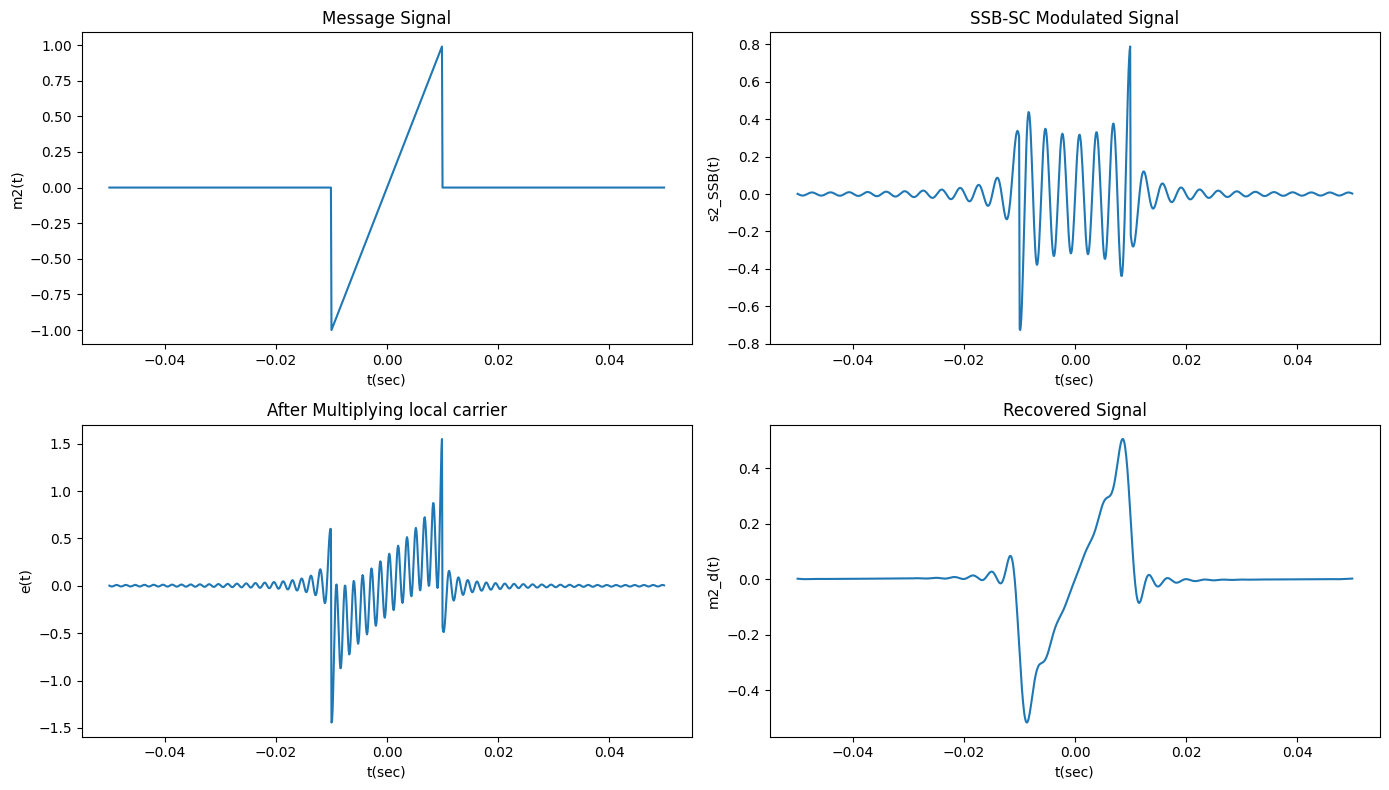

In [496]:
def triangular_wave(t):
    if -0.01 <= t < 0.01:
        return 100*t
    else:
        return 0
Ta = 0.01
fc = 300
Fs = 10000
T = 1 / Fs
t = np.arange(-0.05,0.05, T)
# Create m2(t)
m2 = np.array([triangular_wave(x) for x in t])
# DSB Modulation
sDSB = m2 * np.cos(2 * np.pi * fc * t)
# Band-stop filter design
S_DSB = fft(sDSB)
f = np.fft.fftfreq(len(t), T)
def bandstop_filter(f, lower_fc, upper_fc):
    filter_response = np.ones_like(f)
    filter_response[(f >= -upper_fc) & (f <= -lower_fc)] = 0
    filter_response[(f >= lower_fc) & (f <= upper_fc)] = 0
    return filter_response
lower_fc = 0
upper_fc = fc
SSB_filter = bandstop_filter(f, lower_fc, upper_fc)
S_SSB = S_DSB * SSB_filter
s2 = np.real(ifft(S_SSB))
e2=s2*2*np.cos(2 * np.pi * fc * t)
#Lowpass Filtering
cutoff = 300
order = 12
b, a = butter(order, cutoff / (Fs / 2), btype='low')
m2_recovered = filtfilt(b, a, e2)
fig,axes=plt.subplots(2,2,figsize=(14,8))
# Plot m2(t)
axes[0,0].plot(t, m2)
axes[0,0].set_title("Message Signal")
axes[0,0].set_xlabel("t(sec)")
axes[0,0].set_ylabel("m2(t)")

# Plot s2(t)
axes[0,1].plot(t, s2)
axes[0,1].set_title("SSB-SC Modulated Signal")
axes[0,1].set_xlabel("t(sec)")
axes[0,1].set_ylabel("s2_SSB(t)")


# Plot rectified signal
axes[1,0].plot(t, e2)
axes[1,0].set_title("After Multiplying local carrier")
axes[1,0].set_xlabel("t(sec)")
axes[1,0].set_ylabel("e(t)")


# Plot recovered signal
axes[1,1].plot(t, m2_recovered)
axes[1,1].set_title("Recovered Signal")
axes[1,1].set_xlabel("t(sec)")
axes[1,1].set_ylabel("m2_d(t)")

plt.tight_layout()
plt.show()

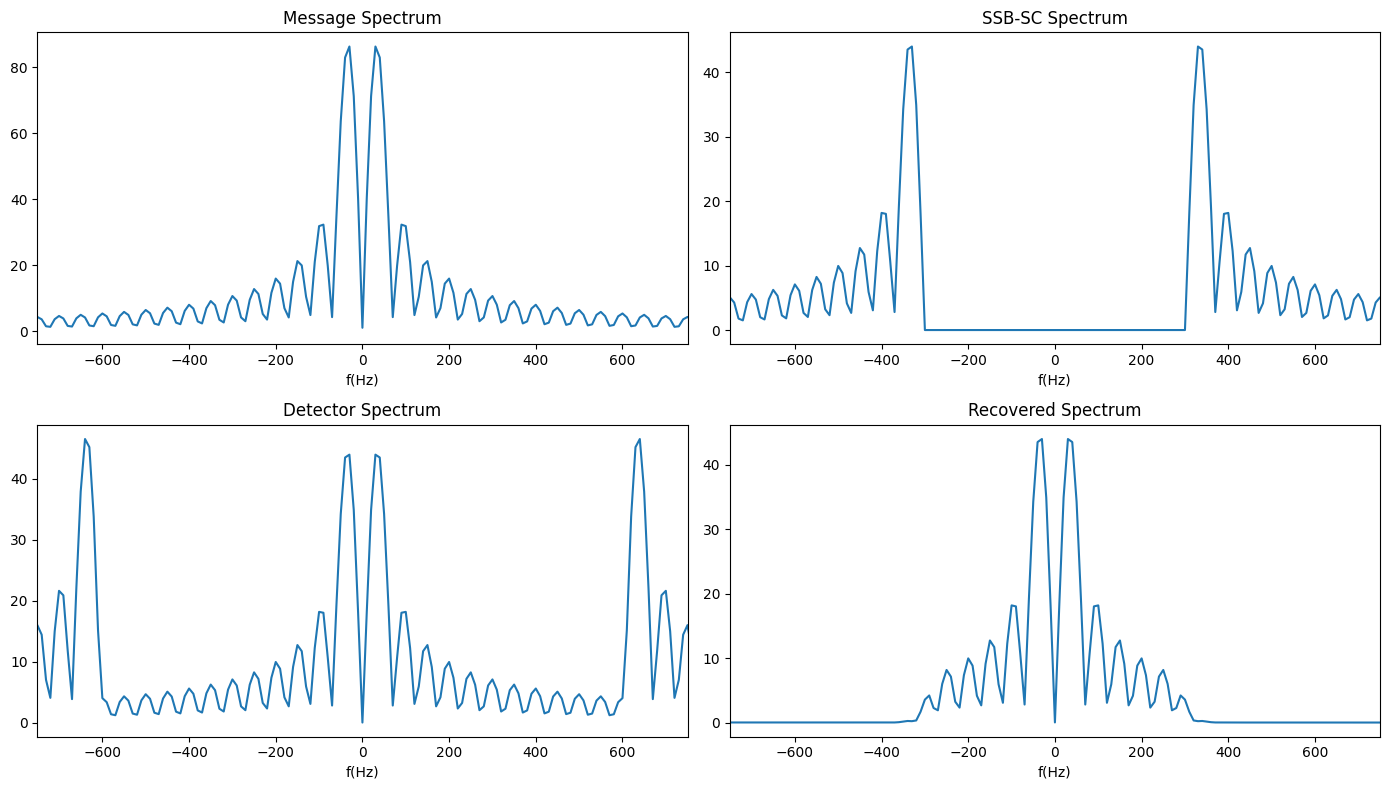

In [497]:
# Frequency domain analysis
def plot_spectrum(signal, Fs, title,ax):
    f = fftfreq(len(signal), 1 / Fs)
    f = fftshift(f)
    spectrum = np.abs(fft(signal))
    spectrum = fftshift(spectrum)
    ax.plot(f, spectrum)
    ax.set_title(title)
    ax.set_xlabel("f(Hz)")
    ax.set_xlim([-750, 750])

# Plot frequency spectra
fig,axes=plt.subplots(2,2,figsize=(14,8))
plot_spectrum(m2, Fs, "Message Spectrum",ax=axes[0,0])
plot_spectrum(s2, Fs, "SSB-SC Spectrum",ax=axes[0,1])
plot_spectrum(e2, Fs, "Detector Spectrum",ax=axes[1,0])
plot_spectrum(m2_recovered, Fs, "Recovered Spectrum",ax=axes[1,1])
plt.tight_layout()
plt.show()

# Bonus
## LSSB Modulation :

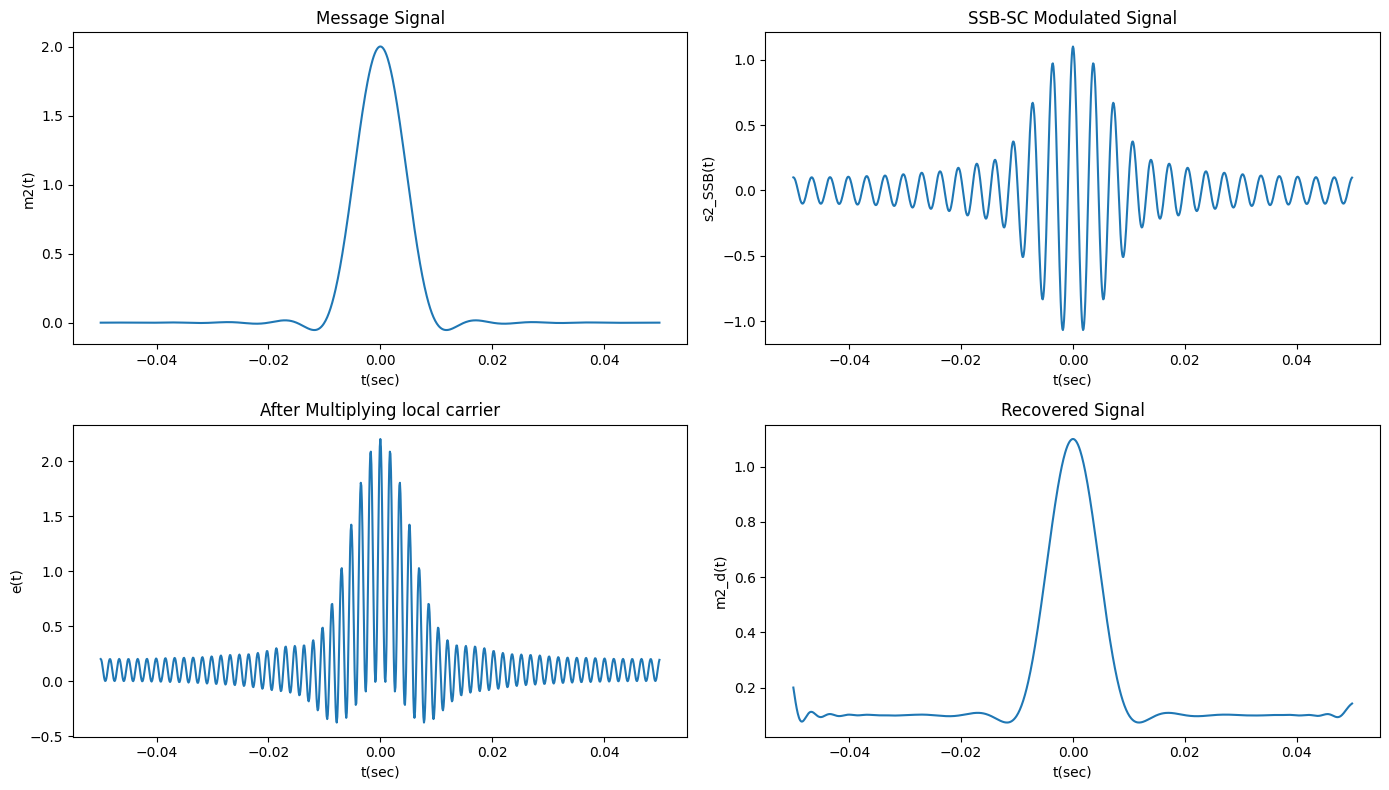

In [498]:
Ta = 0.01
fc = 300
Fs = 10000
T = 1 / Fs
t = np.arange(-0.05,0.05, T)
# Create m2(t)
m2 = (2 * np.sinc(2 * t / Ta) +   np.sinc(2 * t / Ta + 1) +  np.sinc(2 * t / Ta - 1))
# DSB Modulation
sDSB = m2 * np.cos(2 * np.pi * fc * t)
# Band-stop filter design
S_DSB = fft(sDSB)
f = np.fft.fftfreq(len(t), T)
def bandstop_filter(f, lower_fc, upper_fc):
    filter_response = np.ones_like(f)
    filter_response[(f >= -upper_fc) & (f <= -lower_fc)] = 0
    filter_response[(f >= lower_fc) & (f <= upper_fc)] = 0
    return filter_response
lower_fc = 0
upper_fc = fc
SSB_filter = bandstop_filter(f, lower_fc, upper_fc)
# We only should add this line
LSB_filter=1-SSB_filter
S_SSB = S_DSB * LSB_filter
s2 = np.real(ifft(S_SSB))
e2=s2*2*np.cos(2 * np.pi * fc * t)
#Lowpass Filtering
cutoff = 300
order = 12
b, a = butter(order, cutoff / (Fs / 2), btype='low')
m2_recovered = filtfilt(b, a, e2)
fig,axes=plt.subplots(2,2,figsize=(14,8))
# Plot m2(t)
axes[0,0].plot(t, m2)
axes[0,0].set_title("Message Signal")
axes[0,0].set_xlabel("t(sec)")
axes[0,0].set_ylabel("m2(t)")

# Plot s2(t)
axes[0,1].plot(t, s2)
axes[0,1].set_title("SSB-SC Modulated Signal")
axes[0,1].set_xlabel("t(sec)")
axes[0,1].set_ylabel("s2_SSB(t)")


# Plot rectified signal
axes[1,0].plot(t, e2)
axes[1,0].set_title("After Multiplying local carrier")
axes[1,0].set_xlabel("t(sec)")
axes[1,0].set_ylabel("e(t)")


# Plot recovered signal
axes[1,1].plot(t, m2_recovered)
axes[1,1].set_title("Recovered Signal")
axes[1,1].set_xlabel("t(sec)")
axes[1,1].set_ylabel("m2_d(t)")

plt.tight_layout()
plt.show()

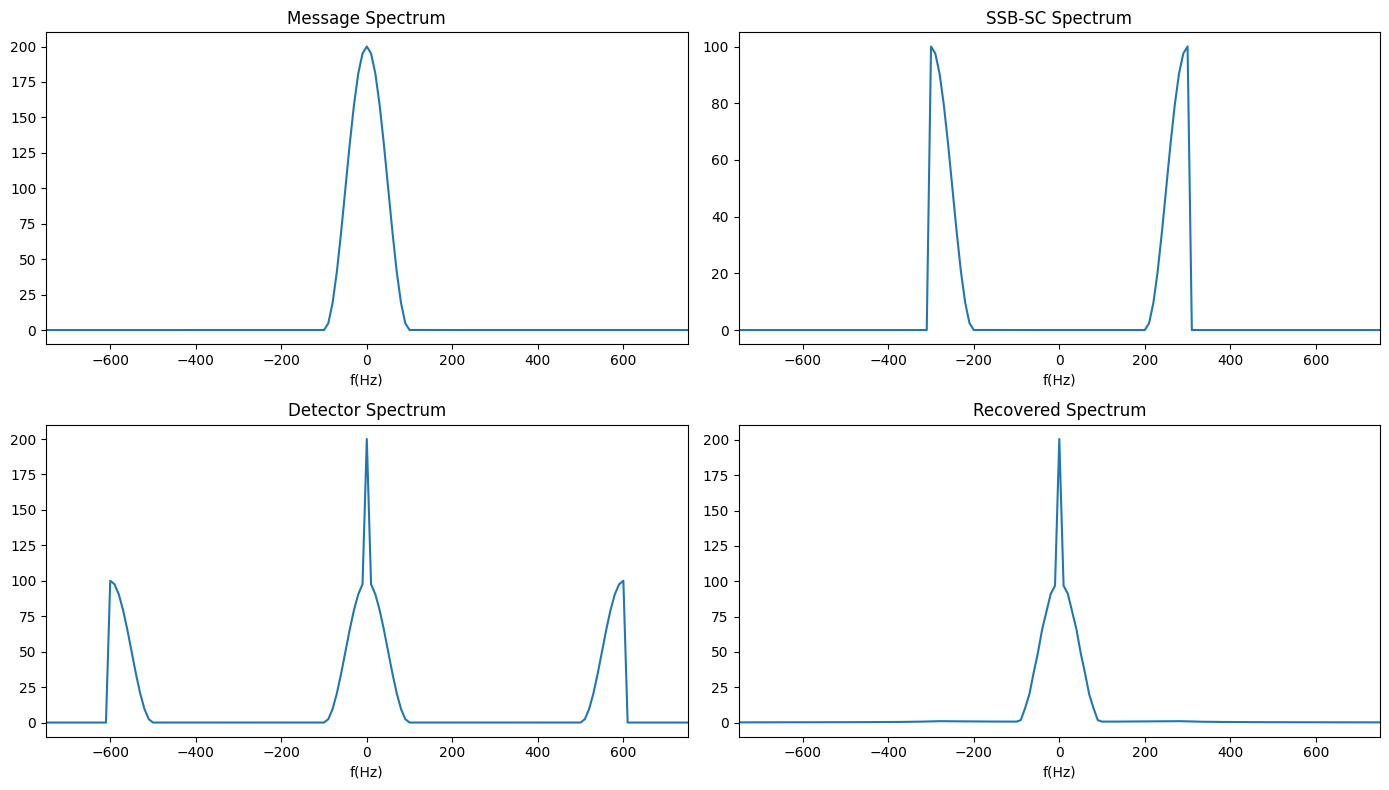

In [499]:
# Frequency domain analysis
def plot_spectrum(signal, Fs, title,ax):
    f = fftfreq(len(signal), 1 / Fs)
    f = fftshift(f)
    spectrum = np.abs(fft(signal))
    spectrum = fftshift(spectrum)
    ax.plot(f, spectrum)
    ax.set_title(title)
    ax.set_xlabel("f(Hz)")
    ax.set_xlim([-750, 750])

# Plot frequency spectra
fig,axes=plt.subplots(2,2,figsize=(14,8))
plot_spectrum(m2, Fs, "Message Spectrum",ax=axes[0,0])
plot_spectrum(s2, Fs, "SSB-SC Spectrum",ax=axes[0,1])
plot_spectrum(e2, Fs, "Detector Spectrum",ax=axes[1,0])
plot_spectrum(m2_recovered, Fs, "Recovered Spectrum",ax=axes[1,1])
plt.tight_layout()
plt.show()

# Question 4

### **Implementing FM Modulation and Demodulation**

This exercise walks you through the creation, modulation, and recovery of a message signal using Frequency Modulation (FM). By exploring the behavior of the signal in both the time and frequency domains, you will gain a deeper understanding of FM's principles and applications. Below is a detailed breakdown of the process:

---

#### **1. Message Signal: Triangular Waveform**
We begin by generating the message signal $m(t)$, which is a triangular waveform. The signal is symmetric and rises and falls linearly. The mathematical expression for the triangular pulse is given by:

$$
m(t) = \left\{
  \begin{array}{ll}
  1 - |t/T_a| & \text{for } |t| \leq T_a \\
  0 & \text{otherwise}
  \end{array}
\right.
$$

Here, $T_a = 0.01$ seconds defines the width of the pulse. The signal has a duration of 0.02 seconds (from $-T_a$ to $+T_a$), centered around zero. This triangular waveform will serve as the input message signal for the frequency modulation process.

---

#### **2. Carrier Modulation in FM**
Frequency Modulation (FM) involves modifying the carrier signal's frequency in proportion to the amplitude of the message signal. The key difference between FM and other modulation techniques, such as Amplitude Modulation (AM), is that in FM, the carrier's frequency varies, not its amplitude.

The FM signal is expressed mathematically as:

$$
s_{FM}(t) = \cos\left(2 \pi f_c t + \phi(t)\right)
$$

Where:
- $f_c$ is the frequency of the carrier signal,
- $\phi(t)$ is the phase of the carrier, which evolves over time in response to the message signal.

The phase $\phi(t)$ is related to the message signal $m(t)$ through an integral, as follows:

$$
\phi(t) = k_f \int m(t) \, dt
$$

Here, $k_f$ is the frequency modulation sensitivity, controlling the frequency shift in the carrier based on the message signal's amplitude. This integral accumulates the effect of the message signal over time, modifying the carrier's phase and, consequently, its frequency.

---

#### **3. FM Demodulation and Recovery**
FM demodulation is the process of recovering the original message signal from the modulated FM signal. The goal is to extract the frequency deviations that encode the message. The standard method to demodulate FM is to differentiate the FM signal.

The relationship between the message signal $m(t)$ and the instantaneous frequency of the FM signal is given by:

$$
\frac{d\phi(t)}{dt} = k_f m(t)
$$

This equation tells us that the rate of change of the phase (which corresponds to the instantaneous frequency) is proportional to the message signal. By differentiating the FM signal, we can extract the instantaneous frequency, which contains information about the original message.

The steps to demodulate the FM signal are as follows:

1. **Derivative:** Differentiate the FM signal to extract the instantaneous frequency.
2. **Rectification:** Rectify the differentiated signal to remove any negative values (since frequency deviations can be positive or negative, but the message signal is typically non-negative).
3. **Low-pass Filtering:** Apply a low-pass filter to smooth out high-frequency noise and recover the original message signal.

The outcome of these steps is the demodulated signal, which approximates the original message $m(t)$, now encoded in the frequency variations of the carrier.

---

#### **4. Analyze and Visualize**
Finally, analyze the results with the following steps:  
(a) Plot $ m(t) $, $ s_{\text{FM}}(t) $ and $ m_d(t) $ in the time domain to observe their behavior.  
(b) Plot the frequency spectra of these signals to examine their frequency content.  
(c) Discuss your observations. How well is the signal recovered? Is there any loss of information due to filtering? What is the impact of isolating the upper or lower sideband on the signal's integrity?

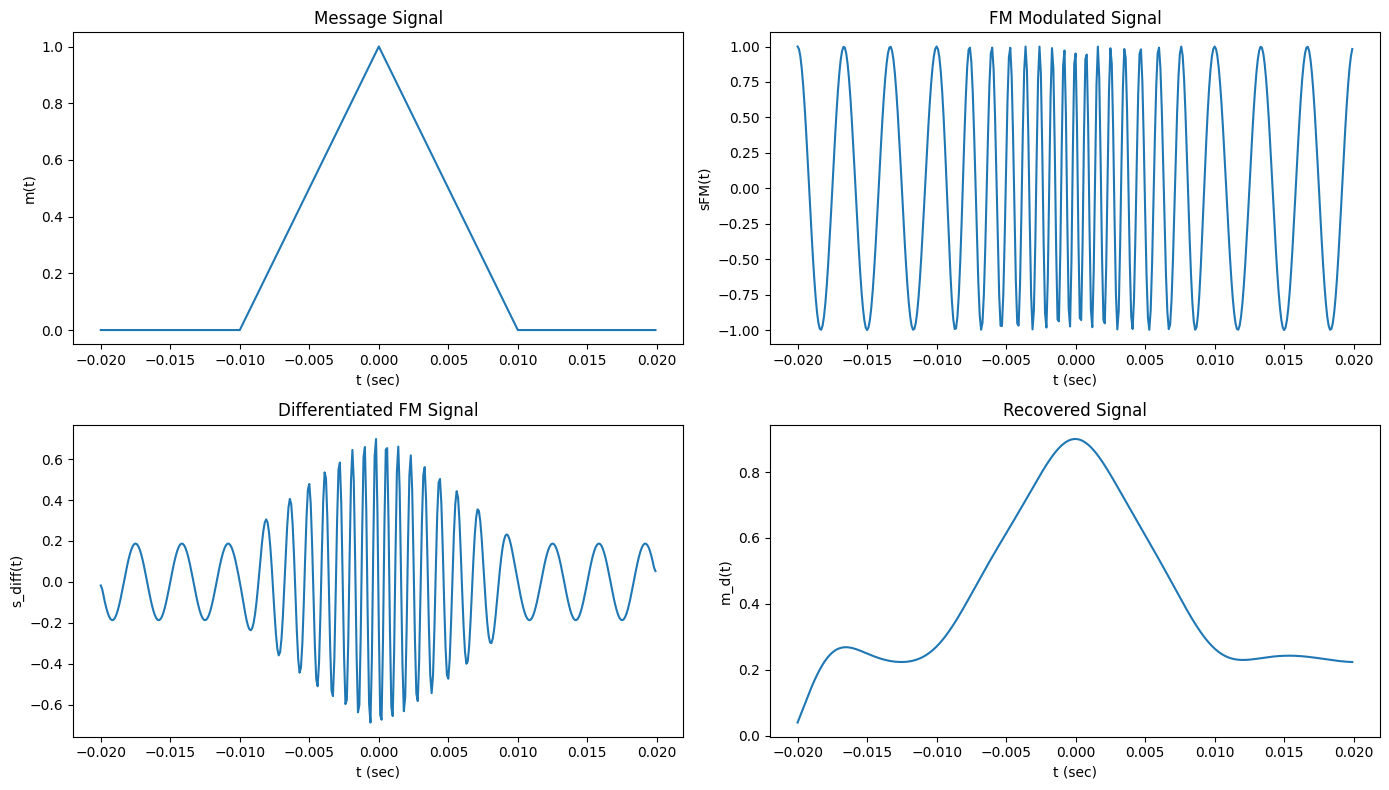

In [500]:
def triangular_wave(t):
    if -0.01 <= t < 0:
        return 100*t+1
    elif 0<=t<0.01:
      return 1-100*t
    else:
        return 0

fc = 300
Fs = 10000
T = 1 / Fs
t = np.arange(-0.02, 0.02, T)

# Generate Signal m1(t)
m1=np.array([triangular_wave(x) for x in t])

# FM Modulation
kf = 1000
phi = 2*np.pi*kf * np.cumsum(m1) * T
sFM = np.cos(2 * np.pi * fc * t + phi)

# Differentiate
s_diff = np.gradient(sFM, T)/Fs

# Envelope Detection and Lowpass Filtering
s_rectify=np.abs(s_diff)
cutoff = 150
order = 4
b, a = butter(order, cutoff / (Fs / 2), btype='low')
m1_recovered = 2*filtfilt(b, a, s_rectify)

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
# Plot Message Signal m(t)
axes[0, 0].plot(t, m1)
axes[0, 0].set_title("Message Signal")
axes[0, 0].set_xlabel("t (sec)")
axes[0, 0].set_ylabel("m(t)")

# Plot FM Modulated Signal sFM(t)
axes[0, 1].plot(t, sFM)
axes[0, 1].set_title("FM Modulated Signal")
axes[0, 1].set_xlabel("t (sec)")
axes[0, 1].set_ylabel("sFM(t)")

axes[1, 0].plot(t, s_diff)
axes[1, 0].set_title("Differentiated FM Signal")
axes[1, 0].set_xlabel("t (sec)")
axes[1, 0].set_ylabel("s_diff(t)")

axes[1, 1].plot(t, m1_recovered)
axes[1, 1].set_title("Recovered Signal")
axes[1, 1].set_xlabel("t (sec)")
axes[1, 1].set_ylabel("m_d(t)")


plt.tight_layout()
plt.show()



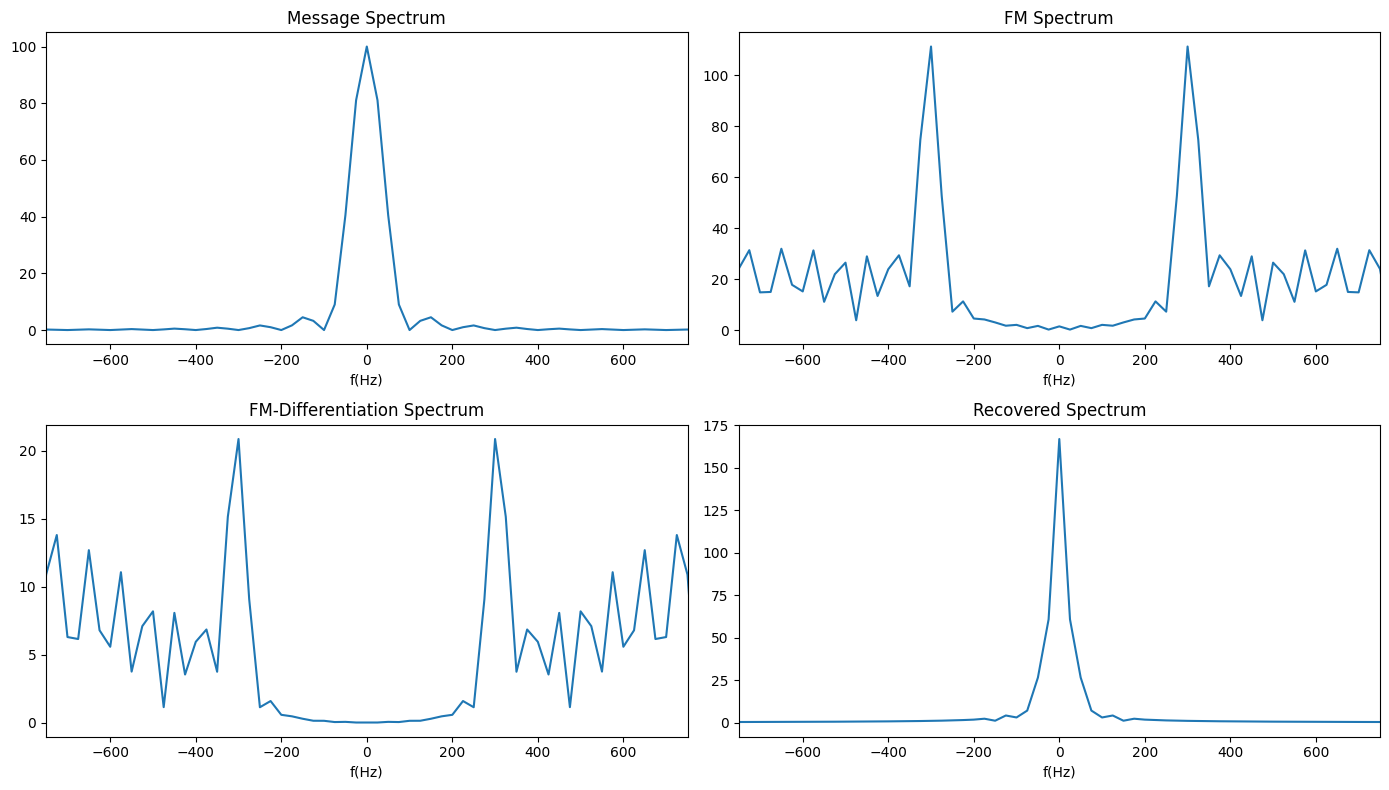

In [501]:
# Frequency domain analysis
def plot_spectrum(signal, Fs, title,ax):
    f = fftfreq(len(signal), 1 / Fs)
    f = fftshift(f)
    spectrum = np.abs(fft(signal))
    spectrum = fftshift(spectrum)
    ax.plot(f, spectrum)
    ax.set_title(title)
    ax.set_xlabel("f(Hz)")
    ax.set_xlim([-750, 750])

# Plot frequency spectra
fig,axes=plt.subplots(2,2,figsize=(14,8))
plot_spectrum(m1, Fs, "Message Spectrum",ax=axes[0,0])
plot_spectrum(sFM, Fs, "FM Spectrum",ax=axes[0,1])
plot_spectrum(s_diff, Fs, "FM-Differentiation Spectrum",ax=axes[1,0])
plot_spectrum(m1_recovered, Fs, "Recovered Spectrum",ax=axes[1,1])
plt.tight_layout()
plt.show()

### **Bonus: Phase Modulation (PM) Implementation Explanation**

Phase Modulation (PM) is another type of modulation where the phase of the carrier signal is directly modified by the message signal. Unlike Frequency Modulation (FM), where the frequency of the carrier is varied according to the message, in PM, it is the carrier's phase that is shifted in proportion to the message signal. The key difference between PM and FM is that in PM, the instantaneous frequency remains constant, but the phase shifts according to the message signal.

#### **Mathematical Representation of PM:**

The general form of the Phase Modulated signal is given by:

$$
s_{PM}(t) = A \cos\left( 2\pi f_c t + k_p m(t) \right)
$$

Where:
- $ A $ is the amplitude of the carrier,
- $ f_c $ is the carrier frequency,
- $ m(t) $ is the message signal,
- $ k_p $ is the phase modulation sensitivity (how much the phase shifts per unit change in the message signal).

Here, the phase of the carrier $ 2\pi f_c t $ is modulated by $ k_p m(t) $, where the message signal $ m(t) $ directly controls the phase shift. The factor $ k_p $ determines the extent to which the message signal affects the phase of the carrier.

#### **Key Differences Between FM and PM:**
- **Frequency Modulation (FM):** The frequency deviation is proportional to the message signal’s amplitude and changes the carrier's instantaneous frequency.
- **Phase Modulation (PM):** The phase of the carrier is directly shifted in proportion to the message signal’s amplitude, but the carrier’s frequency remains constant.

Thus, in PM, the phase of the carrier is varied continuously over time in response to the message signal, and the instantaneous frequency is related to the derivative of the phase shift.

#### **PM Demodulation and Recovery:**

The demodulation of a Phase Modulated signal follows a similar approach to FM but focuses on recovering the phase information. The key steps in PM demodulation are:

1. **Extracting the Phase:** To recover the original message, we need to first retrieve the phase shift $ \phi(t) = k_p m(t) $ that was applied to the carrier. This is done by differentiating the received PM signal with respect to time. Differentiating the PM signal removes the time factor (the carrier's frequency) and highlights the message signal:
   
   $$
   \frac{d}{dt}\left[ s_{PM}(t) \right] = -2\pi f_c A \sin\left( 2\pi f_c t + k_p m(t) \right) \cdot \left( 2\pi f_c + k_p \frac{dm(t)}{dt} \right)
   $$

2. **Filtering:** After differentiation, the resulting signal contains high-frequency noise that needs to be removed. A low-pass filter is typically applied to the differentiated signal to smooth out the variations and recover the original message signal $ m(t) $.

3. **Rectification (optional):** In some cases, rectification may be applied to ensure that the signal is non-negative and to remove any negative values caused by the sine wave in the differentiation step. This can help in making the message signal more interpretable.

#### **Analyze and Visualize**
Finally, analyze the results with the following steps:  
(a) Plot $ m(t) $, $ s_{\text{PM}}(t) $ and $ m_d(t) $ in the time domain to observe their behavior.  
(b) Plot the frequency spectra of these signals to examine their frequency content.  
(c) Discuss your observations. How well is the signal recovered? Is there any loss of information due to filtering? What is the impact of isolating the upper or lower sideband on the signal's integrity?

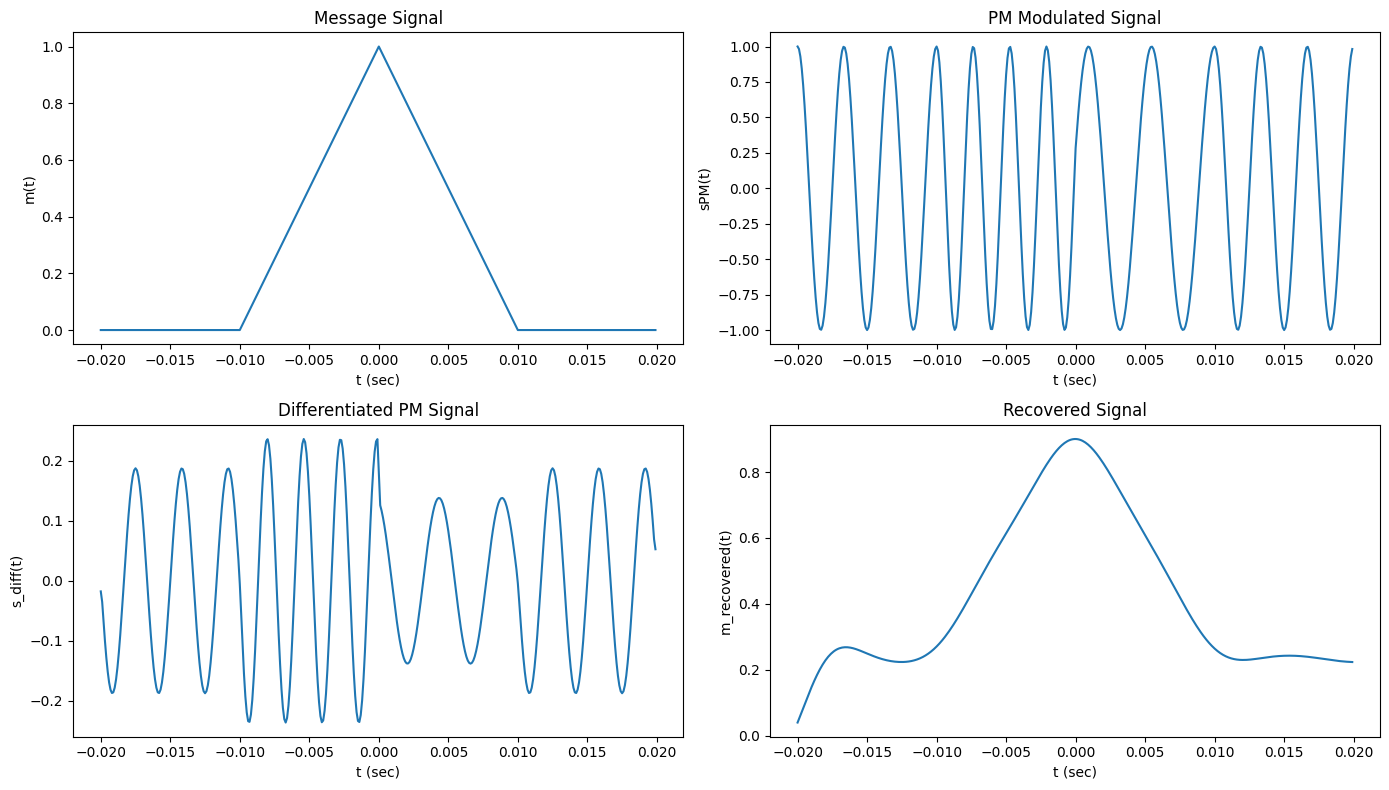

In [502]:
def triangular_wave(t):
    if -0.01 <= t < 0:
        return 100*t+1
    elif 0<=t<0.01:
      return 1-100*t
    else:
        return 0

fc = 300
Fs = 10000
T = 1 / Fs
t = np.arange(-0.02, 0.02, T)

# Generate Signal m1(t)
m1=np.array([triangular_wave(x) for x in t])

# PM Modulation
kp = 5
sPM = np.cos(2 * np.pi * fc * t + kp*m1)

# Differentiate
s_diff = np.gradient(sPM, T)/Fs

# Envelope Detection and Lowpass Filtering
cutoff = 100
order = 4
b, a = butter(order, cutoff / (Fs / 2), btype='low')
m1_filtered = 2*filtfilt(b, a, s_diff)

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
# Plot Message Signal m(t)
axes[0, 0].plot(t, m1)
axes[0, 0].set_title("Message Signal")
axes[0, 0].set_xlabel("t (sec)")
axes[0, 0].set_ylabel("m(t)")

# Plot FM Modulated Signal sFM(t)
axes[0, 1].plot(t, sPM)
axes[0, 1].set_title("PM Modulated Signal")
axes[0, 1].set_xlabel("t (sec)")
axes[0, 1].set_ylabel("sPM(t)")

axes[1, 0].plot(t, s_diff)
axes[1, 0].set_title("Differentiated PM Signal")
axes[1, 0].set_xlabel("t (sec)")
axes[1, 0].set_ylabel("s_diff(t)")

axes[1, 1].plot(t, m1_recovered)
axes[1, 1].set_title("Recovered Signal")
axes[1, 1].set_xlabel("t (sec)")
axes[1, 1].set_ylabel("m_recovered(t)")


plt.tight_layout()
plt.show()



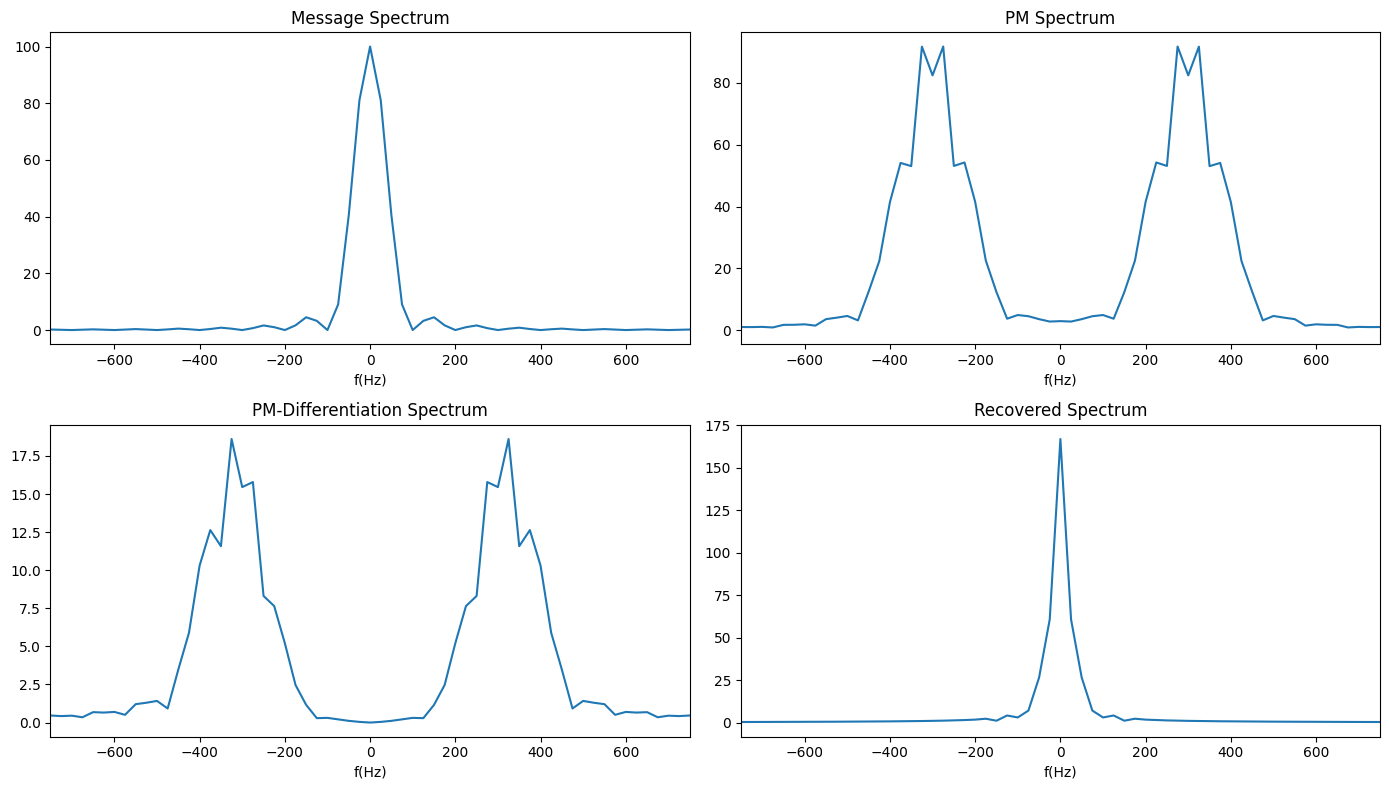

In [503]:
# Frequency domain analysis
def plot_spectrum(signal, Fs, title,ax):
    f = fftfreq(len(signal), 1 / Fs)
    f = fftshift(f)
    spectrum = np.abs(fft(signal))
    spectrum = fftshift(spectrum)
    ax.plot(f, spectrum)
    ax.set_title(title)
    ax.set_xlabel("f(Hz)")
    ax.set_xlim([-750, 750])

# Plot frequency spectra
fig,axes=plt.subplots(2,2,figsize=(14,8))
plot_spectrum(m1, Fs, "Message Spectrum",ax=axes[0,0])
plot_spectrum(sPM, Fs, "PM Spectrum",ax=axes[0,1])
plot_spectrum(s_diff, Fs, "PM-Differentiation Spectrum",ax=axes[1,0])
plot_spectrum(m1_recovered, Fs, "Recovered Spectrum",ax=axes[1,1])
plt.tight_layout()
plt.show()

# Question 5

### **VSB Modulation and Demodulation Process**

This section involves the process of modulation and demodulation using VSB (Vestigial Sideband) techniques, including signal creation, modulation, demodulation, and recovery of the original message. Both time-domain and frequency-domain analyses are provided for a comprehensive understanding of the behavior of the signals. Here's what you'll do:

---

#### **1. Message Signal**
The message signal $m(t)$ is a triangular waveform defined as:

$$
m(t) =
\begin{cases}
1 - \left|\frac{t}{T_a}\right| & \text{for } |t| \leq T_a \\
0 & \text{otherwise}
\end{cases}
$$

Where:
- $T_a$ is the duration of the triangular pulse.
- $m(t)$ is centered around $t = 0$.

This message signal is the basis for the modulation process.

---

#### **2. Carrier Signal**
The carrier signal used for modulation is a cosine wave with frequency $f_c$, expressed as:

$$
\cos(2 \pi f_c t)
$$

Where:
- $f_c$ is the carrier frequency.
- $t$ represents time.

The carrier wave is multiplied with the message signal to achieve modulation.

---

#### **3. VSB Modulation Process**
In the VSB modulation process, the message signal $m(t)$ is modulated onto the carrier signal using the equation:

$$
s(t) = m(t) \cdot \cos(2 \pi f_c t)
$$

After modulation, a **VSB filter** is applied to shape the signal's frequency spectrum.

---

#### **4. VSB Filter**
The VSB filter modifies the frequency components of the signal. It allows frequencies around $f_c$ to pass while attenuating part of the lower sideband, reducing the overall bandwidth. The VSB filter $H(f)$ is given by:

$$
H(f) =
\begin{cases}
\frac{f - (f_c - B)}{2B} & \text{for } f_c - B \leq f \leq f_c + B \\
1 & \text{for } |f| > f_c + B \text{ or } f < -f_c - B \\
\frac{f + (f_c - B)}{2B} & \text{for } -f_c + B \leq f \leq -f_c - B
\end{cases}
$$

Where:
- $f_c$ is the carrier frequency.
- $B$ is the bandwidth of the message signal.

This filter shapes the signal's frequency spectrum, introducing a vestigial sideband and modifying the signal's bandwidth.

---

#### **5. Inverse Fourier Transform**
After applying the VSB filter, the filtered signal $S_{\text{VSB}}(f)$ is transformed back into the time domain using the inverse Fourier transform:

$$
s_{\text{VSB}}(t) = \mathcal{F}^{-1}\{S_{\text{VSB}}(f)\}
$$

This gives the VSB-modulated signal in the time domain.

---

#### **6. VSB Demodulation Process**
The demodulation process involves two steps:

**a) Carrier Removal (Demodulation):**  
The received signal is demodulated by multiplying it with a cosine function at the carrier frequency $f_c$, which shifts the signal back to the baseband. The demodulated signal $s_{\text{demod}}(t)$ is given by:

$$
s_{\text{demod}}(t) = s_{\text{VSB}}(t) \cdot \cos(2 \pi f_c t)
$$

**b) Low-Pass Filtering:**  
After multiplication, a low-pass filter is applied to remove high-frequency components (the carrier and sidebands). The low-pass filter $H_{\text{LP}}(f)$ is defined as:

$$
H_{\text{LP}}(f) =
\begin{cases}
1 & \text{for } |f| \leq B \\
0 & \text{for } |f| > B
\end{cases}
$$

The filtered signal $s_{\text{demod\_LP}}(t)$ is recovered through inverse Fourier transform.

---

#### **7. Analyze and Visualize**

Finally, analyze the results with the following steps:  
(a) Plot $ m(t) $, $ s_{\text{VSB}}(t) $ and $ m_d(t) $ in the time domain to observe their behavior.  
(b) Plot the frequency spectra of these signals to examine their frequency content.  
(c) Discuss your observations. How well is the signal recovered? Is there any loss of information due to filtering? What is the impact of isolating the upper or lower sideband on the signal's integrity?

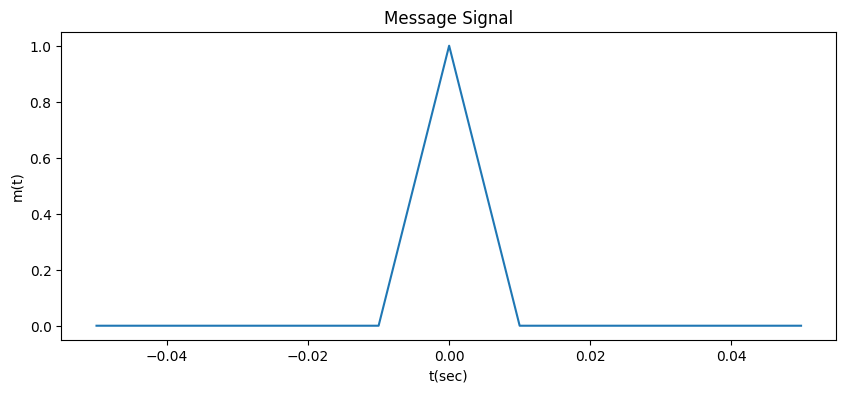

In [504]:
# Part 1
def triangular_wave(t):
    if -0.01 <= t < 0:
        return 100*t+1
    elif 0<=t<0.01:
      return 1-100*t
    else:
        return 0

fc = 1000
Fs = 10000
T = 1 / Fs
t = np.arange(-0.05, 0.05, T)

# Generate Signal m1(t)
m1=np.array([triangular_wave(x) for x in t])
plt.figure(figsize=(10,4))
plt.plot(t, m1)
plt.title("Message Signal")
plt.xlabel("t(sec)")
plt.ylabel("m(t)")
plt.show()


In [505]:
# DSB Modulation
sDSB = m1 * np.cos(2 * np.pi * fc * t)
# VSB filter design
S_DSB = fft(sDSB)
f = np.fft.fftfreq(len(t), T)
def vsb_filter(f, fc, B):
    Hf = np.zeros_like(f)
    for i, freq in enumerate(f):
        if fc - B <= freq <= fc + B:
            Hf[i] = (freq - (fc - B)) / (2 * B)
        elif -fc - B <= freq <= -fc + B:
            Hf[i] = (-freq - (fc - B)) / (2 * B)
        elif abs(freq) > fc + B:
            Hf[i] = 1
    return Hf
VSB_filter = vsb_filter(f, fc, B=50)
S_VSB = S_DSB * VSB_filter
s1 = np.real(ifft(S_VSB))

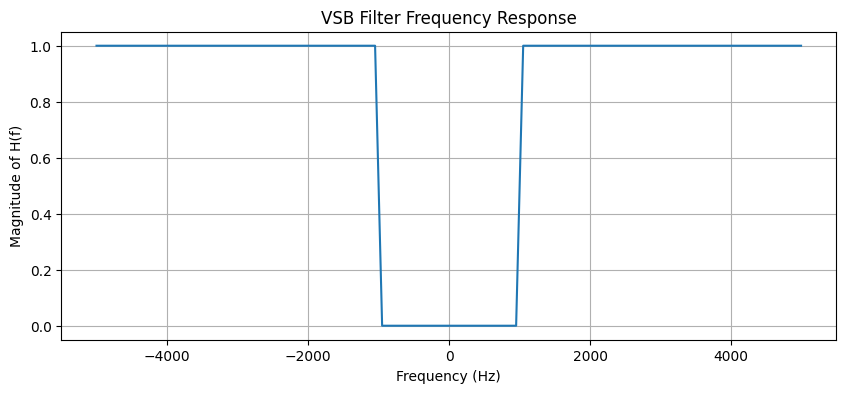

In [506]:
# Plot the VSB filter frequency response
plt.figure(figsize=(10, 4))
plt.plot(fftshift(f), fftshift(VSB_filter))
plt.title("VSB Filter Frequency Response")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude of H(f)")
plt.grid(True)
plt.show()


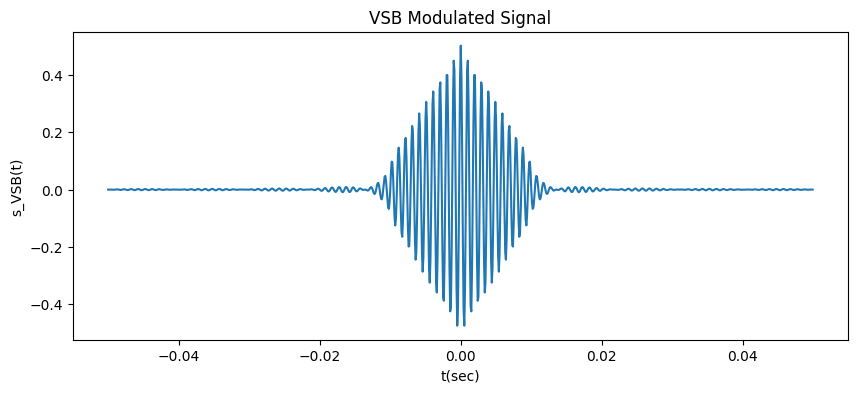

In [507]:
plt.figure(figsize=(10,4))
plt.plot(t, s1)
plt.title("VSB Modulated Signal")
plt.xlabel("t(sec)")
plt.ylabel("s_VSB(t)")
plt.show()

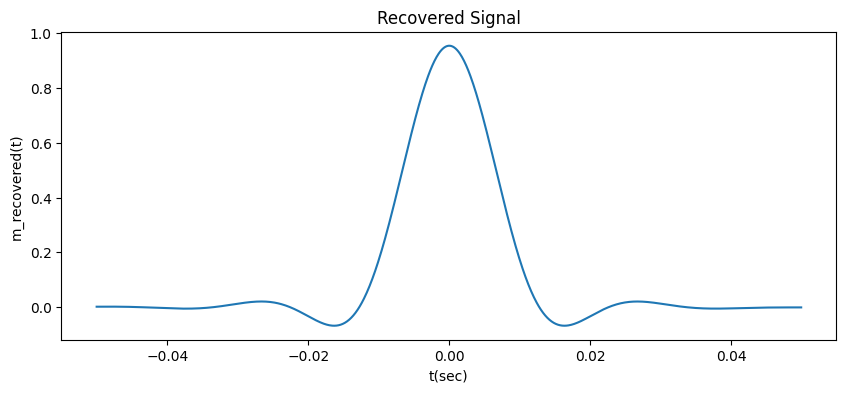

In [508]:
#Demodulation
mym=s1*5*np.cos(2 * np.pi * fc * t)
cutoff = 50
order = 4
b, a = butter(order, cutoff / (Fs / 2), btype='low')
m1_recovered = filtfilt(b, a, mym)
plt.figure(figsize=(10,4))
plt.plot(t, m1_recovered)
plt.title("Recovered Signal")
plt.xlabel("t(sec)")
plt.ylabel("m_recovered(t)")
plt.show()

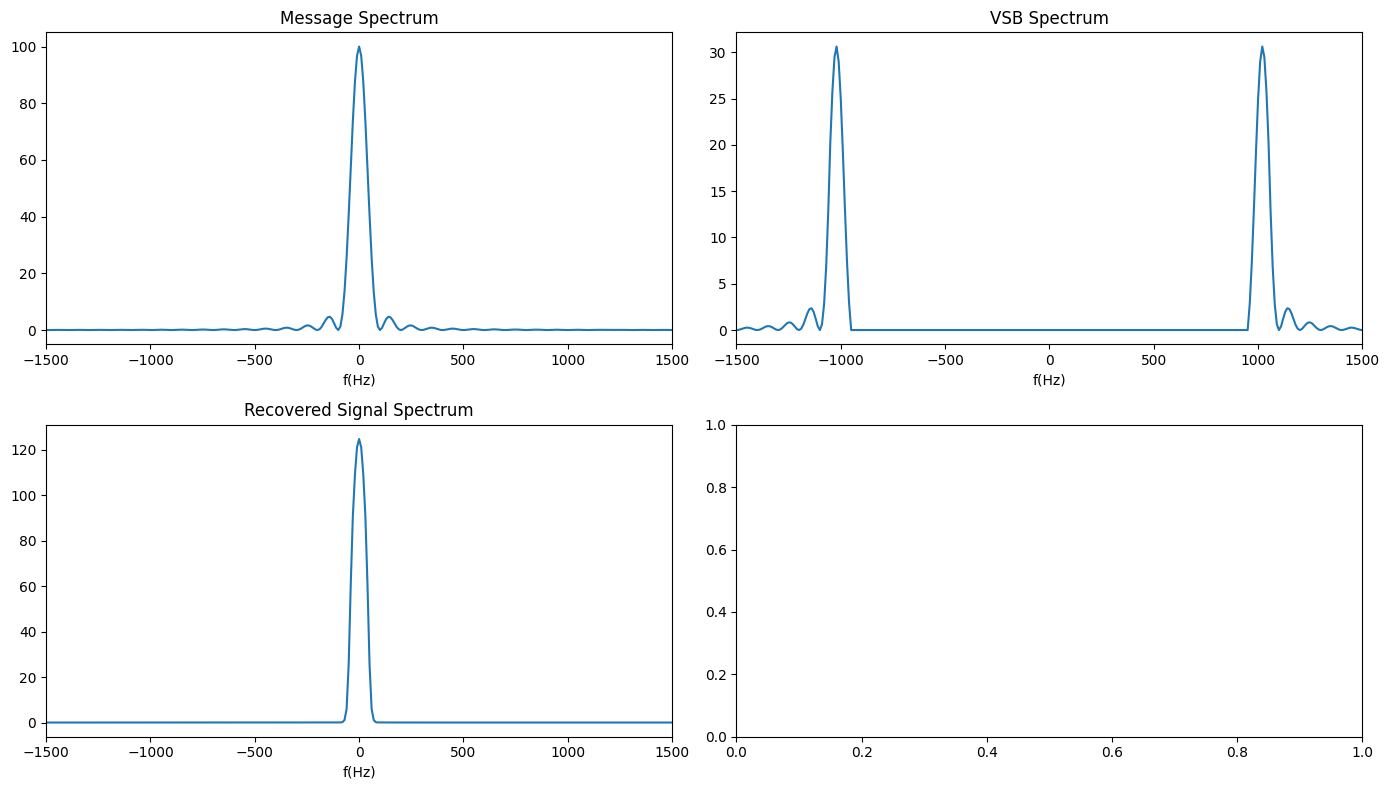

In [509]:
# Frequency domain analysis
def plot_spectrum(signal, Fs, title,ax):
    f = fftfreq(len(signal), 1 / Fs)
    f = fftshift(f)
    spectrum = np.abs(fft(signal))
    spectrum = fftshift(spectrum)
    ax.plot(f, spectrum)
    ax.set_title(title)
    ax.set_xlabel("f(Hz)")
    ax.set_xlim([-1500, 1500])

# Plot frequency spectra
fig,axes=plt.subplots(2,2,figsize=(14,8))
plot_spectrum(m1, Fs, "Message Spectrum",ax=axes[0,0])
plot_spectrum(s1, Fs, "VSB Spectrum",ax=axes[0,1])
plot_spectrum(m1_recovered, Fs, "Recovered Signal Spectrum",ax=axes[1,0])
plt.tight_layout()
plt.show()